In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook

from utils import *
import sys
sys.path.append('/Users/theoares/lqcd/utilities')
from plottools import *
from scipy.integrate import quad

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['/Users/theoares/Library/Fonts/cmunrm.otf'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


TODO:
Extend a Gaussian sampled at a large number of points and plot the contour map of the continuation
Implement Hardy basis optimization with a small number of H
Think about smearing in conjunction with this algorithm

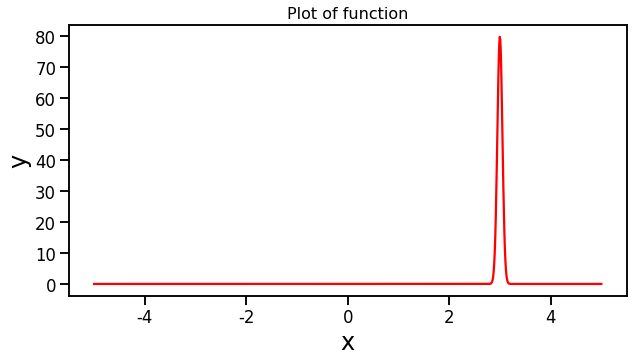

In [22]:
# Use a Gaussian spectral function centered at omega0 with width delOmega
# omega0 = 2.4
# delOmega = 0.35
omega0 = 3.0
# delOmega = 1.0
delOmega = 0.05
rho = lambda omega : 10 * np.exp(- (omega - omega0) ** 2 / (2 * (delOmega ** 2))) / (np.sqrt(2 * np.pi) * delOmega)
# omega_line = np.linspace(0, 10, 1000)
omega_line = np.linspace(-5, 5, 1000)
rho_dat = np.array([rho(a) for a in omega_line])
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, omega_line, rho_dat, colors = 'r', legend = False)

In [23]:
def signal(tau):
    integrand = lambda omega : np.exp(-omega * tau) * rho(omega)
    return quad(integrand, 0, np.inf)

In [4]:
# # Single delta spectral function
# m = 0.8
# T = 64
# # m2 = 1.8
# signal = lambda t : np.exp(- m * t) + np.exp(- m * (T - t))# + np.exp(-m2 * t)
# x = np.linspace(0.1, T, 1000)
# plt.figure()
# plt.plot(x, np.log(signal(x)))
# plt.title('Log[Fake correlator]')
# plt.ylabel('Log[G(τ)]')
# plt.xlabel('aτ')
# plt.show()

In [54]:
Nreal = 20000
omega_bounds = [-5, 5]
eta = 1e-2
np.random.seed(10)
# taus = np.float64(np.random.choice(np.arange(1, 60), 30))
# taus = range(40, 60)
# taus = np.arange(1, 25, 1.)
# taus = np.sort(np.float64(np.random.choice(np.arange(1, 60), 2)))
# taus = np.arange(1, 64, 1.)
taus = [1., 3., 11.]
print('Evaluating Greens function at tau = it = ' + str(taus))

Evaluating Greens function at tau = it = [1.0, 3.0, 11.0]


In [55]:
# change this up
theta_mp1 = lambda z : 0
# theta_mp1 = hardy(0)

In [56]:
# eps = 1e-16
eps = 0
Y = np.array([gmp.mpc(0, t) for t in taus])
# C = np.array([gmp.mpc(signal(t)) for t in taus])
Cfloat = np.array([signal(t)[0] + (1j) * signal(t)[1] for t in taus])
C = np.array([gmp.mpc(val) for val in Cfloat])
zmesh = np.linspace(omega_bounds[0], omega_bounds[1], num = Nreal)
zspace = np.array([gmp.mpc(z, eta) for z in zmesh])

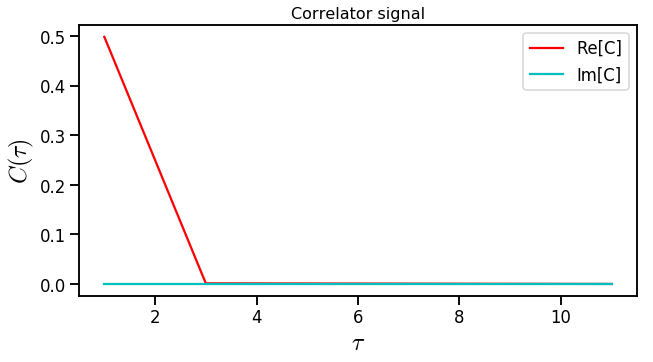

In [57]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, taus, Cfloat, fn_label = 'C', ax_label = ['$\\tau$', '$C(\\tau)$'], title = 'Correlator signal')

In [63]:
lambdas

array([mpc('-0.6019278441441574538476597737590520881794-0.7985504718953660551523339230011808313792j',(128,128)),
       mpc('-0.9999968846186677238158634326879336074598-0.002496116177271032758817614974683806021692j',(128,128)),
       mpc('-0.999999999998884581593546680494638288849-6.229585484996188889456760079924250376662e-13j',(128,128))],
      dtype=object)

In [61]:
# Try continuing first
lambdas = np.array([h(z) for z in C])
Pick = construct_Pick(Y, lambdas)

1.42796550812768190897287381991562163917e-08+0.0j
1.0+0.0j
0.3960807563393461297098553983917747795129-0.7970455022768149236865040042781600853088j
1.0+0.0j
0.3980721558560164837061797614697209637484-0.7985504718941003611614102983413812535009j
1.0+0.0j
0.3960807563393461297098553983917747795129+0.7970455022768149236865040042781600853088j
1.0+0.0j
1.569885173689415659585257385809218249935e-10+0.0j
0.75+0.0j
3.115382446136138725526495546256820339159e-06-0.002496116176645291937142654856378074587821j
0.5833333333333333333333333333333333333353+0.0j
0.3980721558560164837061797614697209637484+0.7985504718941003611614102983413812535009j
1.0+0.0j
3.115382446136138725526495546256820339159e-06+0.002496116176645291937142654856378074587821j
0.5833333333333333333333333333333333333353+0.0j
2.230836812905006775148818687435792244968e-12+0.0j
0.3055555555555555555555555555555555555578+0.0j


In [62]:
np.linalg.eigh(np.complex64(Pick))

(array([-1.2602873e+00, -3.8771354e-11,  1.2602874e+00], dtype=float32),
 array([[-0.7071027 +0.j        , -0.0033953 +0.j        ,
         -0.7071027 +0.j        ],
        [ 0.2207073 +0.44795567j,  0.63401943-0.3150672j ,
         -0.22375168-0.4464428j ],
        [ 0.22486423+0.4472872j , -0.6320389 +0.3150672j ,
         -0.22182937-0.44880006j]], dtype=complex64))

In [60]:
Pick

array([[mpc('1.42796550812768190897287381991562163917e-08+0.0j',(128,128)),
        mpc('0.3960807563393461297098553983917747795129-0.7970455022768149236865040042781600853088j',(128,128)),
        mpc('0.3980721558560164837061797614697209637484-0.7985504718941003611614102983413812535009j',(128,128))],
       [mpc('0.3960807563393461297098553983917747795129+0.7970455022768149236865040042781600853088j',(128,128)),
        mpc('2.093180231585887546113676514412290999916e-10+0.0j',(128,128)),
        mpc('5.340655621947666386616849507868834867111e-06-0.004279056302820500463673122610933842150533j',(128,128))],
       [mpc('0.3980721558560164837061797614697209637484+0.7985504718941003611614102983413812535009j',(128,128)),
        mpc('5.340655621947666386616849507868834867111e-06+0.004279056302820500463673122610933842150533j',(128,128)),
        mpc('7.300920478598203991396133886153501892587e-12+0.0j',(128,128))]],
      dtype=object)

## FFT then continue

In [9]:
Ctilde_float = np.fft.fft(Cfloat)
Ctilde = np.array([gmp.mpc(z) for z in Ctilde_float])

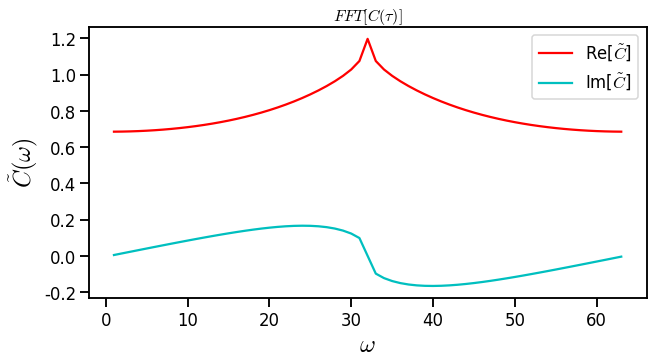

In [10]:
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize = (10, 5))
    plot_1d_function(ax, taus, np.fft.fftshift(Ctilde_float), fn_label = '$\\tilde{C}$', \
                        ax_label = ['$\\omega$', '$\\tilde{C}(\\omega)$'], title = '$FFT[C(\\tau)]$')

In [11]:
lam1 = np.array([h(z) for z in Ctilde])
phi1 = construct_phis(Y, lam1)
NGreal1 = analytic_continuation(Y, phi1, zspace, theta_mp1)
NGreal_float1 = np.array([np.complex(x) for x in NGreal1])

k: 0
abcd|_{Y_k} is: [[mpc('0.3333333333333333333333333333333333333338+0.0j',(128,128))
  mpc('0.1783949585364308193022877888452278087378-0.9839588758025881891121182964545257593212j',(128,128))]
 [mpc('0.05946498617881027310076259628174260291259+0.3279862919341960630373727654848419197747j',(128,128))
  mpc('1.0+0.0j',(128,128))]]
num is: -0.09403934981435097302260924829880910302148-0.1079310577390764477848110342266522555009j
denom is: -0.02980780227603662745619336888777107798888+0.03726173649823025911191959211315369275324j
phi_{k + 1}: -0.5351880914778429345970455482126581482288+2.951878816244540269029162261008993335349j
k: 1
abcd|_{Y_k} is: [[mpc('-0.5000004437851667952509169076911937724771+5.54760991562324897584824741878013459645e-07j',(128,128))
  mpc('-0.08919908720249064799623498526110126537664+0.4919805323196819454024628340499709083535j',(128,128))]
 [mpc('-0.08919812244192550498918033075800884877184-0.4919798756686492348946206225563460911384j',(128,128))
  mpc('-0.50000110946291

0.4966633365381494449337635275743992644872-1.026429978405178296426905465345247195566j
0.4963957775406624219323814564252462345519-1.026420310025855095040101892644434924805j
0.4961284506184395916012870602001376103091-1.026410696037068389008995158918473583902j
0.4958613554047697818330668601736905922147-1.026401136299888907743914769274022736088j
0.4955944915336643915322204347052283380027-1.026391630675807714436247978414493892567j
0.4953278586398594125305368622607267412247-1.026382179026734932787355227687467735476j
0.4950614563588103418321513459164548188635-1.026372781214998224836493243959861098339j
0.4947952843266918419056094947727422629977-1.026363437103341443659487459924867757845j
0.4945293421803973985456340246614029624273-1.026354146554923289677988381226699374992j
0.4942636295575342585977943416714451898953-1.026344909433315806969645104542474561608j
0.4939981460964254602041085538843438673974-1.026335725602503132831925517840589939657j
0.4937328914361043130486358502650333963983-1.026326594

0.4615479714605529834599401840690319901221-1.025552622375620726197925418306096048416j
0.4613094465563358316246642102603833123554-1.025549346931050057863481428203259420141j
0.4610711089942518525214902961581292913943-1.025546110052506515655481367019051445694j
0.460832958493245735275512380307879308255-1.025542911648035398928056021819787007057j
0.4605949947727834124507701203682549064476-1.025539751625949530826486984010513983175j
0.4603572175528478871321422397413344959358-1.02553662989482837738777084534102334576j
0.4601196265539392957607080170697756480864-1.025533546363517226958517707342597747926j
0.4598822214970749682370362936571063923722-1.025530500941126371404596602502874646893j
0.4596450021037852733089227931923735125825-1.025527493537030236028213595093225732241j
0.4594079680961157940843864287582891910668-1.025524524060866593924673681755872411143j
0.4591711191966227622598277357776905378222-1.025521592422535697306132114277090184727j
0.4589344551283752347539483879607964728786-1.02551869853

0.4313670227094754368156446683332476690786-1.025423355496746930438576657431060386971j
0.4311511322524276043784739757774152736726-1.025424495110466278237297638695558546217j
0.4309353958911442807304388144555673927605-1.02542566312018732610991698328648640528j
0.4307198134041703042985060320521961893995-1.025426859463176581108990674086360678729j
0.430504384570435593304504095386710581271-1.025428084076878729248274288459850182006j
0.4302891091692516095559789395958277040093-1.025429336898916123487546234270301083058j
0.4300739869803116556498091672809796573633-1.025430617867088252622666673138047123561j
0.4298590177836911694439004966974063337429-1.02543192691937121107108391471230103832j
0.4296442013598442014553126169568847395491-1.025433263993917193551485940274020124273j
0.4294295374896056232879495721660586452886-1.025434629029053956893877228644144899972j
0.4292150259541872308957444376649579073619-1.025436021963284321227558486013936587081j
0.4290006665351799529748425422791827331939-1.025437442735

0.403137832198647843188578909164659242059-1.025820040096569165847164132216777641033j
0.4029411393404475888037426938212788219171-1.025824553461236053488752332212359516706j
0.4027445734818489632687208502874923290377-1.02582908808958768968338157287822177185j
0.4025481344468106387790111662933567488471-1.025833643939065257803316902809270525796j
0.4023518220595742045980966375016036810591-1.025838220967230303340007555002890107706j
0.4021556361446663504463368831547105946256-1.025842819131764336472187090688162167129j
0.4019595765268954703034367128796899857492-1.025847438390468565503112368265904980679j
0.4017636430313538451379659809451543137461-1.025852078701263501004140788847245610796j
0.4015678354834146009258946625800577720433-1.025856740022188683722711351555848462145j
0.4013721537087321522395388866466684665098-1.025861422311402331780272590359441441684j
0.4011765975332426432639454231439060026224-1.025866125527180988273343703473082397986j
0.4009811667831609159951099734543072763489-1.02587084962

0.3816757237618356302715662144541710637067-1.026455373040126427095561987756704178087j
0.3814923307141367908893748666832107264286-1.026462046064294821091627646241961000699j
0.3813090464389814009623838247160482764724-1.026468736233067026982971836244639784263j
0.3811258707889259144984323827834705310295-1.026475443515608547635317820157190440921j
0.3809428036167521069083968845791604189929-1.026482167881173655001209376781759690254j
0.3807598447754640067566407100768830460453-1.026488909299105254599401967536043692006j
0.3805769941182900329519754232740767059666-1.026495667738834559864613691086693749025j
0.3803942514986802562296019335590390822971-1.026502443169880946530452096649622348307j
0.3802116167703069128860630924446065103132-1.026509235561851688208775538141534955186j
0.380029089787064916125914850588237386678-1.02651604488444169215384586976156420574j
0.3798466704030691257311406984606967138841-1.026522871107433356614135472342560849629j
0.3796643584726564829059185292603810367472-1.02652971420

0.3593789245265186594953074964739670187796-1.027421987230109535170357011014304535122j
0.3592081442163425835138086692442444110132-1.027430604420017082014156732255459527775j
0.3590374557236866970958586893324286015957-1.027439235500471052641586218960340346911j
0.3588668589259922188994549554903551268671-1.027447880450226656984242374800084278105j
0.358696353700874561756493330118040683708-1.027456539248103842653581002043655950932j
0.3585259399261205580626826540518265573637-1.027465211872987262745362174512739619307j
0.3583556174796905330438744311069646370174-1.027473898303825998241006868802048287519j
0.3581853862397158365710418740357886790001-1.027482598519633511708234020740653361614j
0.3580152460844994038772642139365338342691-1.027491312499487447606450622263119330406j
0.3578451968925163141179777989404065323349-1.027500040222529432632073813692343153491j
0.3576752385424113286763418639884019382484-1.027508781667965031497837969537218153635j
0.3575053709130009617462756101251732943211-1.0275175368

0.3333017813636028394594544333280922567928-1.028954181394076820566445887413602365455j
0.3331441658830580642016579651153608713976-1.028964779302586216076491893034194402793j
0.3329866246938885854469808105447658668824-1.028975388447056591143908589823255553153j
0.3328291576970937750167979092676142834202-1.028986008814882169713022685251080994169j
0.332671764793799807924879084798146521643-1.028996640393502456016407352007012742669j
0.3325144458852571739546648009663822448134-1.029007283170402291411490940391734582511j
0.3323572008728426639477989905988925260687-1.029017937133111609522487935947675604673j
0.3322000296580568844945483710309026606032-1.029028602269205493991252688195679186576j
0.3320429321425262431269660623951719829149-1.029039278566303933895206578602655225491j
0.3318859082280007449628992072961665163522-1.02904996601207186341461182650222321477j
0.3317289578163545825479553839377643653813-1.029060664594219012492071727154312492907j
0.3315720808095867238428003223721643407925-1.02907137430

0.3141453086822138443809273926920500967632-1.03036241198637531200264059738330206063j
0.3139962499912163811663919256375255139278-1.030374330261103337342577191754416799607j
0.3138472541155520690693244095763227080874-1.030386258520380275078024148541235183261j
0.3136983209701368604662425676109354016259-1.030398196756627692806267041841702743639j
0.3135494504699835159629043556424307653454-1.030410144962302903200256516464370783139j
0.313400642530203524012353870759697444668-1.030422103129898731754275077430178350002j
0.3132518970660047890650244482035395039175-1.030434071251943624170309529574480405963j
0.313103213992693550139061692822734029254-1.030446049321001414242032851323440186655j
0.3129545932256720714768003317570370490543-1.030458037329671431944635084212343244942j
0.3128060346804405600684373962222216579133-1.030470035270588271455349733647322923219j
0.3126575382725951225206158356626960145065-1.03048204313642187860613477537704592688j
0.3125091039178283629631078957992887406091-1.0304940609198

0.2958318225745690550237007108049366973164-1.031940618791450694531156457365352792783j
0.2956900385458936870164594003917104612674-1.031953746469258101966832613518165716308j
0.2955483073220014933565486969272064451745-1.031966883439169621992057490988328280973j
0.2954066288287005840305565983607097633741-1.031980029697670600024046850296941647964j
0.2952650029918737394201042954835286497198-1.03199318524127574752431426331516914978j
0.2951234297374802662836898404996322771765-1.032006350066528915424717630815959828159j
0.2949819089915538282063847891579919288945-1.032019524170003241461357952258774517215j
0.2948404406802043006144402317440535598293-1.032032707548300923647465767581249247731j
0.2946990247296156032451865599945105058478-1.032045900198053368181030597786914976033j
0.2945576610660475541958520909222992188338-1.032059102115920962963355049528627648017j
0.2944163496158339553673995833924285544055-1.032072313298593202604032340025728183613j
0.2942750903053831907456058793170430820654-1.0320855337

0.2761936186653949308562859510939731442812-1.033896589277046866990695329075443811076j
0.2760586230890024820196315819797487754957-1.033911014345380397056470987467637631094j
0.2759236704701946200141752739207099034115-1.033925448483599467612239195624976465657j
0.2757887607440639794451244027588464427366-1.033939891692015707578184977538551450786j
0.2756538938457581668604443708154997350113-1.033954343970965865640899326238598838639j
0.2755190697104803542614764994367938953073-1.033968805320811712860957047949351402676j
0.2753842882734898714247238456469006694448-1.033983275741939945109063387135421131946j
0.2752495494701004040975294443097548833889-1.033997755234762342605712683445158134759j
0.2751148532356817838344576640705401413834-1.034012243799715544101365873909570648384j
0.2749801995056579480901137612222212579209-1.034026741437261232557110477851411438246j
0.2748455882155087292022483195995630611773-1.034041248147885909302876942281207358617j
0.2747110193007678160499446852264550571066-1.034055763

0.2572952996338914298096505742413625384482-1.036052019275192919385078954881107844751j
0.257165812532823203281497099059752602518-1.036067756161935919460063262684693874099j
0.2570363596156294483219760548426883912819-1.036083502409492928752059286460805145782j
0.2569069408241658007347458050282440818752-1.03609925802160195732720817568754495981j
0.2567775561003262617578482294613079390671-1.036115023002024361221980252431016533028j
0.2566482053860449322798520049303621061428-1.036130797354544613479923038049168443578j
0.2565188886232940695370541605086580058888-1.036146581082970523201064152699178371828j
0.2563896057540858205964203559611537727751-1.036162374191133006513139069093459820999j
0.2562603567204702802519330382871023874868-1.0361781766828863060880469073827625911j
0.2561311414645372237760780075962170044974-1.036193988562107762047056134451605752425j
0.256001959928414395441614690580567934383-1.036209809832698003833088361868098161006j
0.2558728120542680933877682061138916586824-1.03622564049858

0.2407282232751601366660779073688902690243-1.038177905360496402735356326531896970827j
0.2406027054284965736422288152199300620669-1.038194898779716447886693663696625308911j
0.240477214500001513043241590045041079521-1.038211902239825765009611283918645412405j
0.2403517504357962409779584594062531190687-1.038228915747575553115875756301586346283j
0.2402263131820276585457837714960318372119-1.038245939309740530681087890823790264346j
0.2401009026848699720493554282422313623062-1.038262972933118701503214575580991045806j
0.2399755188905230406252933366403385302444-1.038280016624531574046555383688652840412j
0.2398501617452129523803091519334860938969-1.038297070390824078623515186923934215011j
0.2397248311951925997442334292010719110091-1.038314134238864484351265369654509578521j
0.2395995271867400285460263626730474392974-1.038331208175544619251060744974800352134j
0.2394742496661601266826038074200081293462-1.038348292207779635875392572916399486935j
0.2393489985797829737593280906968728211405-1.0383653863

0.2248625953416535039225479895519597572086-1.040437232246754400116921004912921185172j
0.2247400931682159562768051952228485671704-1.040455573868826165540786241355353318136j
0.224617611200907755513776429415195533747-1.040473926589774487324169456943853407925j
0.2244951493885109237622173201410703185976-1.040492290419440909440161436703072270001j
0.2243727076798219500714325736373423379042-1.040510665367692246665592889569683582639j
0.2242502860236523571997253673281438221096-1.040529051444420507228370024627441764968j
0.2241278843688292677921650120364317010646-1.040547448659542815203405416942343506169j
0.2240055026641937963029045746469238947653-1.040565857023001659737080638902283931146j
0.2238831408586027023815112418819786997136-1.040584276544764654289169645377212929219j
0.2237607989009267831773415980392019864734-1.040602707234824786244128865312450205728j
0.2236384767400514397491910872443398988967-1.0406211491032003397837819978231159792j
0.2235161743248772428709764088062197319378-1.040639602159

0.2083669657995892925165166275130084781845-1.043037967354488586328862444700414738664j
0.2082467465104004002577104942119875373738-1.043057919407586726156881555458502897696j
0.2081265405654818731357877765497985692429-1.043077884138916830765982521452235017342j
0.2080063479148912129465437079611436708959-1.0430978615619751657399913584396948372j
0.2078861685086886594165858892617466261493-1.04311785169028708716983275135801863964j
0.2077660022969388138138830625052308130523-1.043137854537406793519536073287929803742j
0.2076458492297090602411827491064621822462-1.043157870116917609997635147873022839427j
0.2075257092570701217942840681344325124967-1.043177898442431918133557280585126521864j
0.2074055823290966162923384885579751167629-1.043197939527591085072193041269777386176j
0.2072854683958654781552066815633445335515-1.043217993386065748909132317218819128038j
0.2071653674074575810415559223365727509389-1.043238060031555570278383736498164738704j
0.2070452793139559466202854803425703988223-1.043258139477

0.1922380520188821538477566068489522226563-1.045851977529014119393210483948661268225j
0.1921191827920474477980097627203994190424-1.045873775344073252149721961945007863787j
0.1920003201656605464640836040845478281507-1.045895587937276632435487458276434702116j
0.191881464089494251320740606181970403975-1.045917415326405089596062060472472135618j
0.1917626145133127542475950221425395599187-1.045939257529274569803507710346494013381j
0.1916437713868721830118634124304364213737-1.045961114563736074830037219608057057243j
0.1915249346599211464959618851978328380655-1.045982986447675600510283087187644665215j
0.1914061042821991689853538951446225209682-1.04600487319901446379005839706647640501j
0.1912872802034382907482099496335266795584-1.046026774835709047301705715115146554382j
0.1911684623733615023289359626090663908236-1.046048691375751126976693007768811981896j
0.1910496507416832896172919376230416359865-1.046070622837167811239668822445214603042j
0.190930845258110178668828803577999619923-1.046092569238

0.1761116931227544950564396214318690161405-1.048959932903088235456754625122766525679j
0.1759932559779009452994220770357201637338-1.048983918935883214409331249864033258722j
0.1758748184924883165372125937451112393882-1.049007922511189016266264726741369670654j
0.1757563806143730358470647830907575013411-1.049031943652122362646892259411561059748j
0.1756379422913906032033720697898189000031-1.049055982381844180131523883622910410364j
0.1755195034713566511504247493055772624704-1.049080038723559446266256389790979654489j
0.175401064102065374655753344967102203512-1.049104112700517569477548287508749420728j
0.1752826241312905905993041147721979712979-1.049128204336012235416244869965731562342j
0.1751641835067852193319995471106683004195-1.049152313653381573794265599357182214982j
0.1750457421762807661273056679495907614178-1.049176440676008325823435951969071258759j
0.1749273000874883804135328076710793117099-1.049200585427319690483966814974462814863j
0.1748088571880971799253772559957346422137-1.0492247479

0.1600983829775868731626972930343868630811-1.052366602644847380894994544511298585978j
0.1599794186706925823404311265985596319688-1.052393184850683662739433546218910486616j
0.1598604467579404243617757617839057195732-1.052419788154429690418166707021536325008j
0.1597414671834953850764335255723119461434-1.052446412585987175606182690646905484222j
0.1596224798914870582109099781905499282083-1.052473058175315306040662912601480166815j
0.1595034848260106941660478648702733729387-1.052499724952430602638866359771402724279j
0.1593844819311266637117110298782416345229-1.052526412947407131375212582496723530789j
0.1592654711508599213672855415424864502584-1.052553122190376715932689167805733920953j
0.1591464524292010540851329068985733907263-1.052579852711528794885597402386961871112j
0.1590274257101045816557023440456644703907-1.052606604541110895944219888539891360609j
0.1589083909374905337171488663001375668186-1.052633377709428374811931590172303289239j
0.1587893480552427496833234300382273076362-1.052660172

0.1428613501623676864078321848097600369507-1.056427281477489487967474095059783858406j
0.142740696816049041158829200644219374728-1.056457239758300311565413588579742252175j
0.1426200274086940020019251359515030100283-1.05648722409601276946905064074433853153j
0.1424993418782276973201547845245989227985-1.056517234530161004740998062828804392274j
0.1423786401625232460231606332308069349492-1.056547271100356959016499621143581320415j
0.1422579221994001170144490575872713256649-1.056577333846290920140303719653327256864j
0.1421371879266251681094665285323643814332-1.056607422807731403880783584236322275501j
0.1420164372819119696853046387521218673818-1.056637538024525462728189162201964049131j
0.1418956702029207712590534316039697353685-1.05666767953659883519736217319686895873j
0.1417748866272584679288379360742709610356-1.056697847383956095485837499612959712968j
0.1416540864924779229136256641142528623021-1.056728041606680964457541303029922501358j
0.1415332697360790063663362104562752583526-1.056758262244

0.1282503788681202345632946109557920549106-1.060220099953700580363079708178574044967j
0.128127338973822347720586806376224586575-1.060253490769965000939978496828132981131j
0.128004275151588302400277875655400121025-1.060286912997374151905199158211002313949j
0.127881187331945969656862638368458050467-1.060320366686217284810821704356515432112j
0.1277580754453511359840400147773387092163-1.06035385188688675582791322777533697145j
0.1276349394221885344240441139989579281625-1.0603873686498779448910008993329350506j
0.1275117791927711264921401245383393477886-1.060420917025789650659905007675803062587j
0.1273885946873400396449112259380404654786-1.060454497065324308014668542687692378748j
0.1272653858360645045737134351993286906826-1.060488108819288206101725406126002555768j
0.1271421525690411355727465235712376997401-1.060521752338591886297136634428840560402j
0.1270188948162949616341593830686704640366-1.060555427674250062984231307467719575026j
0.126895612507777721121397608676379767671-1.0605891348773822

0.1121555684169298639350556435145452127475-1.064805626781505659110559130110999996199j
0.1120288413542207686979221470268979780325-1.064843523703842277889668784130814082086j
0.1119020807494145495649281353939490798962-1.064881459468623043225172914925342633912j
0.1117752865223105412782907393440988743193-1.06491943414171792715327410963811058384j
0.1116484585926119005138620338154055507331-1.064957447789138317177412263067732786511j
0.1115215968799255017538869005442413559406-1.064995500477037342945770762939221804156j
0.1113947013037611566395406590939805546537-1.065033592271710406905805478110116800454j
0.1112677717835326359376318414663935192406-1.065071723239595174978637287009012103064j
0.1111408082385558736947238699737562567485-1.065109893447272413982637956728199939436j
0.1110138105880499885923392657176454731608-1.065148102961465984278478102143229239557j
0.1108867787511365015043873346646260155517-1.065186351849043375025465259005934878023j
0.1107597126468392289331950088619741231672-1.0652246401

0.0941821541848945242769859815285186525796-1.070476948582099707792673811509977061845j
0.09404995003969699203632388905374838704345-1.070520944147506965085492069416657242044j
0.09391770018063864988956439659855596873953-1.070564989243488956819287218661990581621j
0.09378540451187762864291214474655545352643-1.070609083959572978138534152360351248503j
0.09365306293744140661060244876257648993657-1.070653228385490264788754944159185566307j
0.09352067536122605635489555579700716771065-1.070697422611176706722008305584470564483j
0.09338824168699725448743538817774747691706-1.070741666726772974804848479771530327413j
0.09325576181838823393888686687868071209305-1.070785960822625669790830763691587454998j
0.09312323565890138135508231412492268803889-1.070830304989287255514351347146435833207j
0.09299066311190618724641423214418043117595-1.070874699317517212587337222362815941019j
0.09285804408064025478644351183931953094126-1.070919143898282171052049765899667992756j
0.09272537846820854310103268797884097491361-

0.07294282954640570067328647933609366913815-1.077999922074140833571634678881047726162j
0.07280224709683199143184237210224763524963-1.078052867997867065140930640932751575371j
0.0726616022132298873031499653339456275273-1.078105880277226599020069115367858834345j
0.07252089477559304915597098710894528739558-1.078158959041578147082792778525569201621j
0.07238012466373402179650799983145918784182-1.078212104420597283394742648877222043332j
0.07223929175728210470843831026287494578626-1.07826531654427803883558367411785858779j
0.07209839593568434647631900234261757798267-1.078318595542933320208183346416830858431j
0.07195743707820453871312966219544188768547-1.078371941547196087193049976648966336556j
0.07181641506392295926743799176857340736196-1.078425354688020249525147244818330277215j
0.07167532977173611507620863828214611628754-1.078478835096681567072403933985162938427j
0.07153418108035573234202394564425286943085-1.078532382904778838351790315036185290057j
0.07139296886830975142412296815670350490567-1

0.05439779933809760633965631422791875807598-1.085364148631619101231552372305584358805j
0.05424818356132652610684579636100337834037-1.085426758681300972087342431176900776461j
0.05409848837344174815901938067482944330763-1.085489454579723831489738199028496708933j
0.05394871362781591163246354427717587619993-1.085552236505693380803342521335195313226j
0.05379885917758586516020156735818788414712-1.085615104638483053617051486344125028715j
0.05364892487565153229271755942216361231424-1.085678059157835764822646219382584836677j
0.05349891057467557371572789636474205021653-1.085741100243965331206351015008166915514j
0.05334881612708304920693109707955495140058-1.085804228077557896980497191231559306649j
0.05319864138506027886956320593327206455248-1.085867442839773701365258824519555107894j
0.05304838620055583725831482477047852247435-1.085930744712247953788019920158953049453j
0.05289805042527821268868805765212622631735-1.08599413387709311786027904760726119925j
0.0527476339106968004970487777913456493586-1

0.0314713973205824790811743593855830624387-1.095591406154776063102898402221890812065j
0.03130840296089317725813259106662573494815-1.095668828088350248851673438749676093383j
0.03114530484424191675966015445702182719705-1.09574636805329888842114734873999634317j
0.03098210278389638557937259840579954883239-1.095824026316266705887427259272473482321j
0.03081879659281316334173688111369204375335-1.095901803144653767792851414767592865489j
0.03065538608363645431892173891843181565453-1.09597969880661839101600096941177064772j
0.03049187106869768915297689476118504690296-1.096057713571079647821005213940446040565j
0.03032825136001512700591089213068255097588-1.096135847707719880377832982771791957405j
0.03016452676929258541317663054500949028107-1.096214101486987642111451241562884756539j
0.03000069710792049601638117979961398085707-1.096292475180099537884847248009892586695j
0.02983676218697332528343733247003688972285-1.09637096905904381154568564632954964481j
0.02967272181721063069503751444639091010928-1.0

0.005933870948185940534250833504732393565501-1.108589267947101343250373753014045299506j
0.005753178850893280144218534550659794030023-1.108687681805439760180525202676261703624j
0.005572351446836202915752511513242536448613-1.10878626336885053892153449958944117648j
0.00539138849699800451763921488317869750698-1.108885013051284615231630038347778810471j
0.005210289761974351806763692036329915633872-1.108983931267970437118741668931417469337j
0.005029055001973031867928069857779125956117-1.109083018435418571588485892644234088859j
0.004847683976812737434606387688637350088102-1.109182274971426859663118761205274919778j
0.00466617644592443143286870867763292988569-1.109281701295084181750668910942610294713j
0.004484532168348687477797003598228503851162-1.109381297826776446307151313851527700813j
0.004302750902737060446663432556854389185868-1.109481064988190394226876521349628692206j
0.004120832407350881657343963287884398913628-1.109581003202318834766262843625990370245j
0.003938776440061023575695085232787

-0.02079262017024598210373072894585206627307-1.124206000039809689257870301290372232701j
-0.02099475924396285759489873933139971232413-1.124332573334623933265743428365008997789j
-0.0211970709874643271430927917912037398512-1.124459387166529494349002133680452404028j
-0.02139955569627030499510248032950137960056-1.124586442184526095600687733595062155546j
-0.02160221366630195271671632273612732355074-1.124713739039791579771555037165283320533j
-0.02180504519387926339674637105799130724184-1.124841278385689298730567364434016989656j
-0.02200805057572331393214765663493939408175-1.124969060877778481056566415900166309847j
-0.02221123010895292329641655062704136927246-1.125097087173821129941124240377021426597j
-0.02241458409108688546857663196674621063552-1.125225357933792474485717120907308600659j
-0.02261811282004150273536053461316452542273-1.125353873819888509538450946287620523508j
-0.02282181659413081177506655562134846860189-1.125482635496535277813501471434700829026j
-0.023025695712066801464055217502

-0.05022350110494678820842122713234117159347-1.144093618052750149519048246047253796146j
-0.05045220543254986567086720330145180684187-1.144260241434184541187986842824182808493j
-0.05068112625331095267692879695456987032399-1.144427218798546805845607764652840713626j
-0.05091026390677291512734807157991630930658-1.144594551193015132033630616765715641368j
-0.05113961873264952727539067859542957985028-1.144762239668587230355247381787610564271j
-0.05136919107082168819877464142604960799657-1.144930285280096441954363923945067883275j
-0.05159898126133359691487446935656580374276-1.145098689086227922320095877283548069608j
-0.05182898964439011202478319430417630204821-1.145267452149535801052656721476788585366j
-0.05205921656035080314612648056152218920955-1.14543657553645802340452983008774814266j
-0.05228966234972906733752145769681934013968-1.145606060317335016216632548141739801302j
-0.05252032735318609622908429666958335040598-1.145775907566424684426488754775320589166j
-0.052751211911528070740235616673

-0.08293283432746055946127941921443741632158-1.170041155938822370943172320533011120946j
-0.08319357888021351490527770253370281943037-1.170266279567729326144217508743188153046j
-0.0834545848791423988002509961152828622574-1.170491939047428949869144126328420880415j
-0.08371585263309253410031619298097672695686-1.170718136117785166261268014720290490407j
-0.08397738245004914059505905046443207829394-1.170944872525529596963479067319870430441j
-0.08423917463712323628563827851469844534511-1.171172150024292338511675054198043168741j
-0.08450122950053880294626134352415545283992-1.171399970374634102876316453324367232625j
-0.08476354734561609652592905475992352162305-1.171628335344075274849075620342261322307j
-0.0850261284767606413289723720086730843817-1.17185724670713017816169281330992570439j
-0.08528897319744626978997925228875859225541-1.172086706245336434301796874568750708187j
-0.08555208181020175119553691853344116039453-1.172316715747287715093564244925345264477j
-0.08581545461659588576354412146004

-0.1266241934457699014094088039739613724471-1.212573133927253611150726299805260371335j
-0.1269281870025129272932945902691695674899-1.212907095331135778477496418787504922323j
-0.1272324670862448000530746486385643665449-1.213241967120827418898747316452511473647j
-0.1275370335905135341127713442695541087611-1.213577752580548171391686159436082782306j
-0.1278418864032477970747782600754012480644-1.213914455008478093324677774872870377057j
-0.1281470254067006730502660586026425453974-1.21425207771682334897294050462179762484j
-0.1284524504773885676471282216631622596954-1.214590624031877384887041098891842806885j
-0.128758161486036358650785955171745863865-1.214930097294089879049918419498891506394j
-0.1290641582975152374125417103052427934544-1.215270500858128471742638832134568667452j
-0.1293704407707843497228095148710557001129-1.215611838092945580593443428841019475454j
-0.1296770087588302669300760611842360555129-1.215954112381843696281605424818387007788j
-0.129983862108605907670378194862076360378-1.

-0.1714682717274674522228005277699308173149-1.269400025749953295526677001095303897665j
-0.1718074912254765088003474607585451832349-1.269899216279772408453625588742017504684j
-0.1721468931745629697444275895753008502267-1.270399940009543444303564089602938277976j
-0.1724864758137170323392724290903508820779-1.270902202905360593896173684130525190523j
-0.1728262373603837062845954374541388494168-1.271406010958892355915440078979949681436j
-0.1731661760102607687041534864385140503521-1.271911370187480542308427622545771028362j
-0.1735062899370964129133189710389741744612-1.272418286634241611175939432011422969795j
-0.1738465772924820458780541378936409172774-1.272926766368163585127051162798968925755j
-0.1741870362056462564567308778790048055707-1.27343681548420752528661204791605540928j
-0.1745276647832454098761355820944956903235-1.273948440103406825565545315872859986489j
-0.1748684611091526631936865331792553270761-1.274461646372967010800907105244551149955j
-0.1752094232442450833770959138615198234386-

-0.2174995997448715948517465193405367074841-1.352654132850064738322882583372435989279j
-0.217835797276952922510736939839307692089-1.353423200481238099511576125127431123558j
-0.2181716404933398571434524039355888802981-1.35419486534096229482280272647819014731j
-0.2185071219817463753564924972065366262019-1.354969137597140511275780571066915012575j
-0.2188422342569410596674642044990024414693-1.355746027452208771561840413877027221936j
-0.2191769697601015173948605417211383576379-1.35652554514310180990009621927211230225j
-0.2195113208581605187767014630029469448672-1.357307700941208742962964644137185276285j
-0.2198452798431497722602181718263555992729-1.35809250515233227412805753623729429868j
-0.2201788389315368371571993389806215855288-1.358879968116641024911782376704886832229j
-0.2205119902635569254842774667131156613845-1.359670100208619065637009384131270651892j
-0.2208447259025392606061565179145180964968-1.360462911837011892406457814013919471888j
-0.2211770378342276631509449994789014733919-1.3

-0.2543386697413307011509552558048746313352-1.477203769214169249231343734830311794638j
-0.2545337060007221925308558062042395617594-1.478402120176472493306244080743523486203j
-0.2547265364848657663458663461016463473073-1.479604592495099697763871174337224147628j
-0.2549171368547179724845624481064525151862-1.480811198331260965988303955709822253637j
-0.2551054825620843238774381156271910216372-1.48202194981342133302120684879441706246j
-0.2552915488481462523862057067648106628032-1.483236859035858008215198830157774906229j
-0.2554753107419838634921131957908390302104-1.484455938057193849053585339003997764898j
-0.2556567430590944724210520807076555451374-1.485679198898905680125248734660159400688j
-0.2558358203999080316410844025056943899786-1.486906653543813682992803176894483812489j
-0.2560125171482971897209382510577807334933-1.488138313934535248708609415805247431765j
-0.2561868074700853609826292305114476961852-1.48937419197192471618294621106465939054j
-0.2563586653115505450647500474207959792186-1

-0.257480574633803551751112562062524007534-1.624122640754690861755933354928683297515j
-0.2572770127881977242022834574219014533366-1.625794655613598381816944932091862009983j
-0.2570673815813136367489105240968210574727-1.627471483199825793271417666376251008587j
-0.2568516278343645317400737887148130940217-1.62915311903750506366599540633019470139j
-0.2566296980407031889938570323199744788297-1.630839558284633574869762314361827734969j
-0.2564015383659786347873329447317197567202-1.632530795727415656925394733648726208756j
-0.2561670946483494205319265069184917839973-1.63422682577454126560255670508909093624j
-0.2559263123987536365278157948447446663361-1.635927642451410702558900950525180351131j
-0.2556791368012371333025912964684540585685-1.63763323939430387887628164611702013129j
-0.2554255127133414851280146086636436707458-1.639343609844492605102659993132542899783j
-0.2551653846665516566437634511091041520839-1.641058746642305051699235217401259100208j
-0.2548986968668081070110065067709170028329-1.6

-0.1830058765255402458734882696892813749483-1.83712736025849862687517741655286093365j
-0.1817293315310179742212517360681091790337-1.839185304327684984648246971032737954678j
-0.1804393125929588002538167167429134469898-1.841243704757809526820792732371123395337j
-0.1791357533436738448711576757198171177369-1.843302471649539976488954220648050281718j
-0.1778185878223450205930713431067763916614-1.845361513934860033138013494187936470697j
-0.1764877504915892493711201890724988794296-1.847420739372624591086122795394274659209j
-0.1751431762542446164619657801945360872567-1.849480054544292825474119460690927036066j
-0.1737848004703709430151707240352851953226-1.85153936484985563989242065537293259097j
-0.1724125589744651394107506104458991174642-1.853598574503961229900884318426615411613j
-0.1710263880928916856891767827107323544909-1.855657586532242570787229454797898673624j
-0.1696262246615198206951180774878549123851-1.857716302767863491242029005532022811036j
-0.1682120060435848116529434232975346590674-1

0.1619284665375206179576125088202847265335-2.076876190344541918157699931555670657809j
0.1652995121379946605208018714142929986803-2.077538927018215452191243441250648954764j
0.168679235243316006254629003262408175562-2.078180517695982443142325161993831218691j
0.1720674476597229692929818088074297203013-2.078800837946467312369105786441523138914j
0.1754639591123029636503966253330789827492-2.079399765458880377030868045707220491871j
0.1788685772728907173192937964682378205415-2.079977180083241939626908703181000476354j
0.1822811077888350532281827344181763199467-2.080532963870207972907466498636215020105j
0.1857013543126469444019341755850297719131-2.081067001110479139256673341837031340999j
0.1891291185325199690144055155064172965873-2.081579178373770883157151998380632044743j
0.192564200203713643707431917469888019907-2.082069384547322541793368054810315163433j
0.1960063971808108927366937093457866527888-2.082537510873926487954888060561896583633j
0.1994555054507962205013688876105919003732-2.08298345098

0.6270059232698503862862332356733532028919-1.943898157877221875311573980113679371754j
0.6294325726112414137724476744484843776567-1.941605287230648935543940766732731770939j
0.6318406549390343189988039591245889188736-1.939301044710568329097510828313418694866j
0.6342301130833579127010643269853491752295-1.936985633309309698826616599103575291175j
0.6366008925948932311602733888904397072359-1.934659256009593182425623096237918227496j
0.6389529417325637262710593125921491235365-1.932322115742461288924365147895512990601j
0.6412862114505100716777282204863560782047-1.929974415345668972624627032322423911632j
0.6436006553843763848065981194335351128954-1.927616357522531867462249377124344692117j
0.6458962298368914239653708410227957562778-1.925248144801276027042539253578177697328j
0.6481728937628009948516416018605496153447-1.922869979494859065068759780318694606654j
0.6504306087531354035021239230698715404792-1.920482063661305096588295273384618098341j
0.6526693390188395452035080421170420962705-1.918084599

0.7921880298866280957914895188305645517553-1.602430452248846872837786277045062961532j
0.7923826656492141559686943728396413566972-1.60007413165867093607454739045212167493j
0.7925662456042467672656702088409432608725-1.597724329529102195237206002652230344918j
0.7927388654356781387793984964633234340046-1.595381086827081958916238848500890445892j
0.7929006205697960924002781651888844774507-1.59304444342602008732365099159646112679j
0.7930516061654588768093742178397045717212-1.590714438117369325716895189024893910824j
0.7931919171045752935733703267552853916624-1.58839110862219372459325570865426477827j
0.7933216479828252906782559800032093610655-1.586074491602758541346180555845412614939j
0.7934408931006194083861764796662097637726-1.583764622674125380945904363743849852575j
0.7935497464542943339107253880750073864479-1.581461536415751007588049283002508602476j
0.7936483017275418677681677541730447011192-1.57916526638308830280116468101478866035j
0.7937366522830691679248176477035646152416-1.5768758451191

0.7502955509501181068065947562182237921971-1.346206050977051962404266186574976030405j
0.7496910027507300238430107542969046029133-1.344814212731450050311329486221717541042j
0.7490844558256806617784559052830835473028-1.343428551712195678856483902695253280879j
0.7484759456998320438632561275926984119966-1.342049045632118180241455361559661861891j
0.74786550754072080634088897319665229528-1.340675672155362091828526053079981335877j
0.747253176161170474597048413154316423187-1.339308408900241903001979746432984449919j
0.746638986021901891731878993134717371795-1.337947233442048322697250590654742182914j
0.7460229712341380765409067136363729965414-1.336592123315799420832858695405238348419j
0.7454051655622112628622444132455583137466-1.335243056018955356570830984289316001123j
0.7447856024261607881818757974680346716103-1.333900009014073105151021029669741991019j
0.7441643149043295993553697346601172160505-1.332562959731419916915290290897030654378j
0.7435413357359557071347310743672063287777-1.3312318855715

0.6622979829306035982864741468759443466377-1.206809396636745041163879785109872683563j
0.6616323565096047939634721834460559950386-1.206048025728751984191126677950098783909j
0.6609672094148188725469085789262410874692-1.205290080183570295141439315285066208136j
0.660302548847146312967995799808768252164-1.204535543388627663716043982107589196108j
0.6596383819043571058093310199112980217142-1.203784398804206658662977399485475515669j
0.6589747155821875779527070889344899929599-1.203036629963369193336071279529670653877j
0.6583115567754240820896959482280771785515-1.202292220471872431077335344185299024526j
0.6576489122789824643143065665145159952458-1.201551154008086203244536068034260305722j
0.6569867887889715942140628325730485261937-1.200813414322898774193367312676921869544j
0.6563251929037498728686349790981532934444-1.200078985239621037156596327601609729553j
0.6556641311249712541663425811617474607166-1.199347850653885263175423955447626206523j
0.6550036098586214418818621117878267073279-1.1986199945

0.5918532807690740224888087613383853952849-1.139474798950355469462285165000351061702j
0.5912682045432583060415473093273958856813-1.139009457942933192827499380962625273105j
0.5906839690240907553929704316268371918788-1.138546096729508932774696093990906781198j
0.5901005747808261147074813211804367192001-1.138084705719017522705171728635565943461j
0.5895180223543133474828805952265647326749-1.137625275370053992458380547827516474083j
0.588936312257348943012011068736903188617-1.137167796190636685989711171454852766275j
0.5883554449750238878166322562026500590148-1.136712258737968854622958344103393054361j
0.5877754209650720869793956154599009283331-1.136258653618204828592178907233141395417j
0.5871962406582099395589063708709690076943-1.13580697148621265304233356925950056422j
0.5866179044584748560966055907645780201928-1.135357203045339299197166337665007584976j
0.5860404127435596531620241302393611124275-1.134909339047176020975623542503068309306j
0.5854637658651433778853017803552981970399-1.13446337029

0.5218504117858778568454943645761608326566-1.092104630879054542431707167417152553801j
0.5213738986801745809743251035205171764209-1.091833645116830784464234521563979544368j
0.5208981522587874287402817733360914456947-1.091563721959614987741716733391834968057j
0.5204231713469227839116640841109337469237-1.091294856588365681745474054326721346503j
0.5199489547660995727011981189595454179569-1.091027044208810627856730206922513219825j
0.5194755013342294645684743331704085470846-1.09076028005131088290460302404381940252j
0.5190028098656965453361253191970970007582-1.090494559370725822636311756574854622335j
0.5185308791714339552138644150362849831891-1.090229877446277708202372087410024650624j
0.518059708059003797254148301970920318929-1.089966229581419330469947572191818920774j
0.5175892953326719298895121430492422061164-1.089703611103700009462163270292127159502j
0.5171196397934839522498736144903968631568-1.089442017364633488337152534870986552426j
0.5166507402393398717361867722341057745762-1.08918144373

0.4761746489014353520499678258095302052005-1.068838286476400406561513078384277575823j
0.4757712023161151897160165926311611050132-1.068655948624238551811223965298357724203j
0.4753683915279979567851144204433229244119-1.068474283172082721610755315816563143384j
0.4749662152741722278329694882809448898985-1.068293287267469619722604722697260125496j
0.4745646722927514271449133066604231732387-1.06811295807192298747599614273375803383j
0.474163761322894683572523698745717185304-1.06793329276087767766219093707327289906j
0.4737634811048277373776773044854043564804-1.067754288523604321770363511019670981587j
0.4733638303798617705500543414410346822653-1.067575942563133635439695284555751234728j
0.4729648078904154950783520438801001564728-1.0673982520961827429439233480745783901j
0.4725664123800333924404226377189618768145-1.067221214353080338725902398645586238229j
0.4721686425934054415203300859802752116205-1.067044826577693069748474140372539490183j
0.4717714972763862040589589851631844164819-1.06686908602735

0.4273015526851485633717656041246900538651-1.0494354450508774934904895780930359175j
0.4269726377558252808765334962535333655093-1.049322428758404128758145076485627166029j
0.4266442037231752448826906202744297285734-1.049209802353041386516682431178395898903j
0.426316249562282073617022868700210244751-1.049097564322819131163046892997291593314j
0.4259887742503145210168280460062033736573-1.048985713162636666380708018956684941162j
0.4256617767665268399977208029644023233025-1.048874247374227568607553956050956713466j
0.4253352560922576330376013909087711625781-1.048763165466124224519428083857299518628j
0.425009211210931546078685578519559976252-1.048652465953623555439912471681165183211j
0.4246836411080579981914665041367700463981-1.048542147358751947577829058003064240453j
0.424358544771231305104802731830808908085-1.048432208210230872725034525632818797615j
0.4240339211901304540237740731394147334211-1.048322647043442603593434209618043232575j
0.4237097693565188211310522429401834934102-1.04821346240039

0.3855053967371743356617720560235178388534-1.03682230910202836371704027728455968256j
0.3852347499410786182200463154090936402777-1.036751772399318316712353257033462262312j
0.384964460201790621280748855709044727656-1.036681467573627221234763885343153960209j
0.3846945267689695426024400767734125367544-1.036611393804920950251252573242234541306j
0.3844249488940298650368953309139703330922-1.036541550276594025034291834622121237326j
0.3841557258301368717393486393164616234421-1.036471936175453030379196438881574944638j
0.3838868568322045509999621443260128063133-1.036402550691700736767995643037869625568j
0.3836183411568911024348711126709272738296-1.036333393018919688372586891918210648973j
0.3833501780625956368018824141905891494027-1.03626446235405618736264269248012029214j
0.3830823668094546324397132768368570145534-1.036195757897404301431922555965759630166j
0.38281490665933838806502968935543517743-1.036127278852589956182570054553055526142j
0.3825477968758477091544858156408682141159-1.03605902442655

0.3528357733873039283402762812648305574957-1.029291983711711389305760627524232458075j
0.352606112698630234542695256576447992648-1.029245927274872585510611782176489718667j
0.3523767244123075616359012751827969627716-1.029200019388714732384878066147827481926j
0.3521476079777147680149287739513326433648-1.029154259569962247795519756338095148533j
0.3519187628455282086596776684831498631389-1.02910864733721461413492953900480006436j
0.3516901884677184893334201550130507513508-1.029063182210938073929713813453916216472j
0.351461884297547429125809130159317160151-1.029017863713457407025865635045198691928j
0.3512338497895640152542299554551476928072-1.028972691368947547889997535918573822109j
0.351006084399602391015142753953246989087-1.028927664703425646208090129025068189464j
0.3507785875847778216149369271572643045737-1.028882783244742765581115418822627814658j
0.3505513588034836799697198225952215017751-1.028838046522575824151726735656306373777j
0.3503243975153882354271017516275393545678-1.0287934540684

0.329907560411707629849743212672842292764-1.025151991041197481530025714457981170375j
0.3297039449602853828044696151589690528041-1.025119315869369147634178981462627093242j
0.3295005501696593313061142129728982951776-1.025086747038369862953698756199524846244j
0.3292973756098513329443891143130883756251-1.025054284224447102499588100655332763184j
0.3290944208518708611056477588163280196625-1.025021927105035580242431131472236057244j
0.3288916854677125996064619047863025185628-1.024989675358752319466715681486451769858j
0.3286891690303531436225916200485605353181-1.024957528665391603461028489393908340303j
0.3284868711137495072629887356102730104086-1.024925486705920235845382425334777875566j
0.3282847912928358366610028139415224974588-1.024893549162472537537706281332388901069j
0.3280829291435210299054064258794224822087-1.024861715718345510129360330602302178962j
0.3278812842426861830790899283812816864944-1.024829986057993993499333165767247157875j
0.3276798561681820425529398235549830721362-1.0247983598

0.304610367081816049315288999676640704286-1.021628899647994883647177403480772100025j
0.3044326734902374840464366560925014758081-1.021607925980696919594476812776587859617j
0.30425515112653756435177826929764072018-1.021587024372838814127619343558446126384j
0.304077799671707691581397188227495721289-1.021566194622695133591229885279886665634j
0.3039006188074351702167210223880486794301-1.021545436529234344613307995529176099899j
0.3037236082161007507004453051319555332249-1.021524749892116043523299444693855975293j
0.3035467675807777506855100833411756404722-1.021504134511688381975866954868014515509j
0.3033700965852296074856296232292923494622-1.021483590188985320003269713661181353869j
0.3031935949139082224985985228101507771443-1.021463116725723983136102289725315736016j
0.3030172622519521531259838253180911195934-1.021442713924302012791708342600209802805j
0.3028410982851848096135720992601057979219-1.021422381587794928340481968735306953091j
0.3026651027001128130338679241820721614268-1.0214021195199

0.2786231643666760369442298718553639188011-1.019105935594206931869759757213418675904j
0.2784688461363984065187351531455569202945-1.01909418614933608066594185285236203423j
0.2783146565256426176473856619211772160468-1.019082484135732398269597683249760240978j
0.2781605953051115433933135337976312786991-1.019070829433898691662265237052491171617j
0.2780066622459703220113433567099972050514-1.01905922192472356057238016248693562368j
0.2778528571198453090217008032777638003161-1.019047661489480026467937188560644498586j
0.2776991796988228954482201561560125359281-1.01903614800982415674621615856568444704j
0.277545629755448329324212598740552488808-1.019024681367793694550956231336939797118j
0.27739220706272467666019723541322586488-1.019013261445806704313020575933665523182j
0.2772389113941111045307096605384923429842-1.019001888126660172217421934534204977054j
0.2770857425235225298867942247299269722198-1.018990561293528713603726151363763623116j
0.2769327002253279088876200036672363246932-1.018979280829963

0.259423799994618585582524476893032915816-1.017931024102941739235667030867620097065j
0.2592845347967390618434054505099184368386-1.017924597243707608801245472323394665601j
0.2591453717196659420358362267654927361215-1.017918205000202204844296227326471289216j
0.2590063105856832787937417917759745023359-1.017911847293507567244649745129052881142j
0.2588673512174074138954006837712124002363-1.017905524044950606495645176637206464554j
0.258728493437785656840749192453083561452-1.017899235176102260632032979690870188359j
0.2585897370700955837840490099757105024443-1.017892980608776683749061800526498434083j
0.2584510819379442150614368600772096665544-1.017886760265030431974757590372674159962j
0.2583125278652671949476051653116738051895-1.017880574067161652574390816681404148454j
0.2581740746763280965553365472855090968142-1.017874421937709281622472419099906062271j
0.2580357221957171142605974065701527308533-1.017868303799452217505860974048410068022j
0.2578974702483509878972731815261898892522-1.01786221957

0.2421155738817285586143416630076618880986-1.017360115551202947028396022801505461265j
0.2419882042010562274541186313055330119627-1.017357606119997361900728403799400203798j
0.2418609160491360925128712159860245790832-1.017355122837147634543225566202348051979j
0.241733709285200761009787529097038605364-1.017352665649680732411093922466834172755j
0.2416065837687239145029288504992606980007-1.017350234504784105266691566134667291453j
0.2414795393594198375763827163716314538895-1.017347829349805183382076232036233869094j
0.2413525759172423840074442678706413556757-1.017345450132250866926082185903600821714j
0.2412256933023850727160313147067425788683-1.017343096799787038512180632823742791468j
0.2410988913752800568432352151351405088647-1.017340769300238056177891812770420197828j
0.2409721699965976586210990078644162364896-1.01733846758158625888736556343100864413j
0.2408455290272457928905828071255379832524-1.01733619159197147168706678365406950587j
0.2407189683283693921317931262245541092474-1.017333941279

0.226311289301565287049785754620221773125-1.017235403291150029224614801308413826044j
0.2261933528784760474418635446961175728805-1.017235880658243242879040292106655269883j
0.2260754816270516773439975513806073158604-1.017236378507260827366943084945363826935j
0.2259576754332920501747380707342658531169-1.017236896802337420867250679229012156063j
0.2258399341833739166821003406191022196619-1.017237435507715966245335076372786140295j
0.2257222577636505913041730988129304802609-1.017237994587747391236026651236501633158j
0.2256046460606515348201897144624918925838-1.017238574006890290134648855209065062145j
0.2254870989610819380614290865013231537992-1.017239173729710606576946603329399696781j
0.2253696163518224109906964944845443340621-1.017239793720881316844033732978204436141j
0.2252521981199281512201436424932514146682-1.017240433945182117027925816539727979784j
0.2251348441526291569256745129971608429012-1.017241094367499105748866566041980177696j
0.2250175543373293973494344628619936402482-1.0172417749

0.2103858342168700124972489744832878089142-1.017487007812304316905753169452391917757j
0.2102759858212151347351180676671389991256-1.017490047676112520608301836115686039551j
0.2101661881870993100727490276821407800644-1.017493103926669396443621008370911128334j
0.2100564412216628121800943635142970416901-1.017496176540594996742145887230690928598j
0.2099467448321733733691223624273494656699-1.01749926549458193374893258630899200927j
0.2098370989260259876246801426726505269602-1.017502370765395175924210245246339492305j
0.209727503410742616782213582316544950312-1.017505492329871847574203253512939210092j
0.2096179581939718974331381052185279748164-1.017508630164921029117277388367506029629j
0.2095084631834889457799704606121306135672-1.017511784247523555174539472368598810871j
0.2093990182871946770510446542265087135099-1.017514954554731827318823661054904309517j
0.2092896234131160980550045096660023111501-1.017518141063669599424842806340181869142j
0.2091802784694056279487245993250308935099-1.01752134375

0.1942206853102422206742677282557337051349-1.018125138849653927203121113500622485194j
0.1941175543396669044533158410452405838768-1.018130438896724439403181871926461094776j
0.1940144613252596527454367229172760949312-1.018135752506351146053216090565161204682j
0.1939114061905513167165596296503534009187-1.018141079664195495608803923028739200115j
0.193808388859162679271058072140781819331-1.018146420355967058849400515118553255089j
0.1937054092548048023280493577376154930438-1.018151774567423373178433747511070252776j
0.1936024673012784593046101652944062272209-1.018157142284369834579683766335931814734j
0.1934995629224740257902043220301484952913-1.018162523492659566290129462936555868392j
0.1933966960423712791834337770440721264971-1.018167918178193292551206112055948359849j
0.1932938665850391988336112811925266902029-1.018173326326919212711872995148569441383j
0.1931910744746358579626847086935941721107-1.018178747924832870861036637958588984079j
0.1930883196354078596737286527938746425363-1.0181841829

0.1783495515959715505025333750438806078832-1.019122625688449607756023157897962153631j
0.1782515227569755251095640504945073262713-1.019129918872704497325787566249707119396j
0.1781535207925673285767748889870788573422-1.019137223876505934220002413900411387161j
0.1780555456383298467016000133317058056418-1.019144540691735356484123827247950860293j
0.1779575972299099705688550199514643467849-1.019151869310305812884549369270863113555j
0.1778596755030185508659826012841364093653-1.019159209724161870568113249000172056631j
0.177761780393429917778142138420236018815-1.019166561925279555515570892134048589741j
0.1776639118369822709175288867140254586039-1.019173925905666227972934483967330342591j
0.1775660697695771999343243884193107612511-1.019181301657360523245246272236855623214j
0.1774682541271796403820109340359933960509-1.019188689172432260089016712490765032169j
0.1773704648458177429835273319162107919357-1.019196088442982355797150076614238476128j
0.1772727018615827432772054203690153019839-1.0192034994

0.1651438117718879030260930146284963942415-1.020228912608681727156277030350922271184j
0.1650488897500679332873279073759120131771-1.020237761546067720806276974541127477823j
0.1649539863235562462559286716045719168721-1.020246621451513225765975034374186038181j
0.1648591014356228556138798835709958106927-1.020255492320495659039330423153069983962j
0.1647642350295869066393638231410581697779-1.020264374148513656430166884329010635696j
0.1646693870488166765699137382511339695213-1.020273266931086996468460455386304018192j
0.1645745574367294909906529548725336677843-1.02028217066375653226985590435596424231j
0.1644797461367916405592253235234091409072-1.020291085342084123473584329191607833817j
0.1643849530925183822481113506538488875984-1.020300010961652560326122120311426872755j
0.1642901782474735200030326115573793583076-1.020308947518065527492246573843180972626j
0.1641954215452698276105976596336767116384-1.020317895006947488661340346392217536938j
0.1641006829295686299967400968405415958235-1.0203268534

0.1518253039579708569311976150607456390814-1.021593464567706164893785923562477530436j
0.151732476324981570046010091893794067176-1.021603834524739547252991061258349519954j
0.151639659690541680384248202752847715782-1.021614214989096761184110795377962086429j
0.1515468540042255253961479318184560240406-1.021624605958610891376488070671859782608j
0.1514540592156480835751791333896700407-1.021635007431127044255132238112273164496j
0.1513612752744650204775911233991590748184-1.021645419404502275527187686080351561865j
0.1512685021303723230750931403823343987678-1.021655841876605563971566074507577940333j
0.1511757397331067584853350576148013215962-1.021666274845317692739437939714568821763j
0.1510829880324455089891179072976959925042-1.021676718308531223109574755490616832913j
0.1509902469782062194270623594194974263837-1.021687172264150422012863866516493885454j
0.1508975165202469625293086012164466095599-1.021697636710091198790142803825752858364j
0.1508047966084662045878505767701522643825-1.02170811164428

0.1382722571162982404677724972406858536026-1.023229668926555634404084806882561552123j
0.1381805257377501469478993458097802331306-1.023241565251303940689900360661526920359j
0.1380887983689491481541388904579890285442-1.023253471860632159255997707832187742233j
0.1379970749652357815958894776894253635438-1.023265388753448192818155577523689683883j
0.1379053554819896970592722241776075444627-1.023277315928662307996425420352352674529j
0.1378136398746297553890859073698448271112-1.023289253385187054448337226165528448543j
0.1377219280986137203952608174584037659701-1.023301201121937236936810064427009658544j
0.1376302201094387657119580533631422239545-1.02331315913782978127846466219171560266j
0.1375385158626411674950419597001270170202-1.023325127431783706213008875129970675159j
0.1374468153137964048031892887403064760506-1.023337106002720042185046865430956515734j
0.1373551184185191789218736991292891040017-1.023349094849561760631861769647725785364j
0.1372634251324634330882577933851402437387-1.0233610939

0.1245335470404471179971422045326754622637-1.025128450633313062502816137547381680771j
0.1244419402122907818945347155717101938268-1.025141877259814712088056923814356189942j
0.1243503311500224259541098419662309571172-1.025155313992625881970132172875651771864j
0.1242587198152752484311907226067682880824-1.025168760830163404579219726730346686618j
0.124167106169728879020540454715653184641-1.025182217770834645153614705667806992945j
0.1240754901751095447027188654231333676504-1.025195684813037399970710482279316072264j
0.1239838717931901547380959960731552560616-1.025209161955159806326126690824655889216j
0.1238922509857903861675459208094620372369-1.02522264919558025234029241144967935082j
0.1238006277147768511955356464247246925607-1.025236146532667274600021150177559705424j
0.1237090019420628582096250454399862054334-1.025249653964779515577140284895979682656j
0.1236173736296089870488142492077239691129-1.025263171490265560989557666692503984656j
0.1235257427394228510468929541988687762276-1.02527669910

0.1105627113234688991844389997907710964782-1.027284107166312600149709711213618669011j
0.1104703534407446032625085573838888511556-1.027299044307050325423489686688028269828j
0.1103779880857833441933831391048941324959-1.027313991149113102816780014225282189873j
0.1102856152285674710367758808843498324122-1.027328947688336042471957736567746665373j
0.1101932348391447718357979146815824171204-1.027343913920528890075132244694373507545j
0.1101008468876291378825647908419087706336-1.027358889841475825411740245086652268934j
0.1100084513442004082458691401273864875993-1.027373875446935393503702703894502104188j
0.1099160481791046251372787800655067279628-1.027388870732640369098126381049073645996j
0.1098236373626542078931494405810655314535-1.027403875694297634190433931074455345446j
0.1097312188652281276096720071657754152571-1.02741889032758805530245528485461979131j
0.1096387926572721645222248997010960724698-1.027433914628166347167236825203725863192j
0.1095463587092987555951483765332746703967-1.0274489485

0.09754755246947149492599676181555788914408-1.029467394098382019024325855149239625113j
0.09745388871760697056513335061601631377707-1.029483635558917205402996718803954085958j
0.09736021401750074309116325437261068201739-1.02949988583215187737601241868621744594j
0.09726652835031071856985001005856526533237-1.02951614490906620335312820952768885322j
0.09717283169729065230161289647357551161367-1.029532412780595522282830838919568654141j
0.09707912403979175205439655723772072342401-1.029548689437629954416061568368903913036j
0.09698540535926178581567645281065898667703-1.029564974871014445082313120824955386215j
0.09689167563724585448182032728257562806411-1.029581269071548519349068628626832376904j
0.09679793485538716567105230367181729860909-1.029597572029986036135923546199527602041j
0.09670418299542614327987896010518491022829-1.029613883737035231601866041126429635496j
0.09661042003920203535494632182956189656803-1.029630204183358327961903590230950210931j
0.09651664596865185844009574578828958081434-1

0.08451189433817380157192479686795496343168-1.031787443205946901952429757675614679833j
0.08441658720753101268161201435063332542627-1.03180479390617478449857474745194921654j
0.08432126756860639358926221626266019539947-1.031822151677996923260199454334934663425j
0.08422593541878399306820091703272880288621-1.031839516504586779078266017892325640076j
0.08413059075558867195496406791303715260257-1.031856888369048815293592958308800278717j
0.08403523357668783882214676301279051606546-1.031874267254418060591381181823246162284j
0.08393986387989047688749838645788231126097-1.031891653143660165283929724678799069817j
0.08384448166314888160434823440077277772713-1.031909046019670963606846438661033691069j
0.08374908692455785823328236261345588612916-1.03192644586527649894215147867160747122j
0.0836536796623556140588180142242880408694-1.031943852663232740137215020089180106702j
0.08355825987492465178497256925321453471964-1.031961266396225297431192175955753980497j
0.08346282756079096886424651434379951355865-1.

0.07153325531157540250599776574463737739899-1.034186021189066284147936700867257935436j
0.07143629794037109600855266218221354554001-1.03420414407316357350188720971228423341j
0.07133932915022086485693719443788207016515-1.034222271053960312151511082676023767941j
0.07124234896135477402850070503760110719455-1.034240402103527801675062801646574975456j
0.07114535739420170368942920534581264210721-1.034258537193841752765215755511130097224j
0.07104835446939120086769619241767331221719-1.034276676296781830505282383569581910107j
0.07095134020775274761992237089666421196441-1.034294819384131682884256922735058954876j
0.0708543146303167524106509980281447377885-1.034312966427578647359854359024384065726j
0.07075727775831554237402522988475302230422-1.034331117398713457423452372061836372244j
0.07066022961318263251686064363713998844563-1.034349272269030271687044827915933624831j
0.0705631702165545807965939885849494088563-1.03436743100992621952294204104146053832j
0.07046609959027008573294153770274145563739-1.0

0.06129517632098922450655672608882698877273-1.036105580181378576201566242112098066746j
0.06119717012230177399400015710845683808728-1.036123961860422027845968841526344714449j
0.06109915580899914466065386534489008007615-1.036142344145017419351409214741772541937j
0.06100113342492463802941312871512966751733-1.036160726996149908108557277954760011255j
0.06090310301417218259567263828247795234198-1.036179110374689743444120788205181131784j
0.06080506462108823131550749325853577372105-1.036197494241391842656240080678151782857j
0.06070701829027104731804515097346652412712-1.036215878556895857418710585970523765056j
0.06060896406657173079303612455958597623851-1.036234263281725914230330127355593629497j
0.06051090199509524611677847920976065434274-1.036252648376290355432512722466534842788j
0.06041283212119970715156671092729481211092-1.036271033800881807382098809598353007153j
0.06031475449049827522045607656866802184289-1.036289419515676759368053139399604569497j
0.06021666914885826998315412506050911933707

0.05096968839667043457730710659037368839892-1.038031084506264388094985196178314029911j
0.05087111905888601058791640843860281848022-1.038049294468778531181654322901604334529j
0.05077254767607460848891430295390096030211-1.038067500284957545702935607534276160484j
0.05067397432118645365333463998158854338274-1.038085701902953713360098299273508843024j
0.05057539906747406041107072058915427363579-1.038103899270791509250567028592418379012j
0.0504768219884932165645059864782849671354-1.038122092336367435140760274859314141887j
0.05037824315810396701641958849779172524259-1.03814028104744985411791258731725659876j
0.05027966265046984542210058147866420899471-1.038158465351679149596636130730819380341j
0.05018108054005973139204901216652613223308-1.038176645196567400928625467497082767558j
0.05008249690164690505076824479637174865353-1.038194820529498577142570469593351122092j
0.04998391181031090230957246612430922109275-1.03821299129772821521785426745202695977j
0.04988532534143674249861696308089546405653-1.

0.03983750383936327087131671473268121780861-1.04004960297421469126718682839783084125j
0.03973923873369350141858529601714608626985-1.040066986107127351537704031164794725051j
0.03964098184226290391173494823560886830554-1.040084358418308308814749052861470435843j
0.03954273327484418985167066822397162378422-1.040101719841356467946477038552844594123j
0.03944449314155584297665473555956455372852-1.040119070309744638364672324687453738852j
0.03934626155286291278347121503136717536244-1.040136409756819562192979049927490882218j
0.03924803861957606064040845844001961275066-1.040153738115802252557939011334342920496j
0.03914982445285322073124039375372708137837-1.040171055319787871976208422238054697922j
0.03905161916419846681706766027987747470672-1.040188361301746105539708248720608691671j
0.03895342286546366784275077355009958679202-1.040205655994521043956213321513612147647j
0.03885523566884752422575815881608769225068-1.040222939330831530080603837043712381512j
0.03875705768689634606073784614165026412647-

0.02592724568318779272666224344626790217951-1.042391806488629821205287446675438656807j
0.02583143790653089325983721799506496578865-1.042406910867550022706405136843857376514j
0.02573565763150320640956500017681147274258-1.042421993746226807839552912762190296455j
0.02563990501858679920164961864807219274343-1.042437055042608490759793930934315644116j
0.02554418022861522317796547257631221564827-1.042452094674559948675817958775122008556j
0.02544848342277188968732827371253312658244-1.042467112559863340071641757811251297646j
0.0253528147625911610659888139269175428354-1.042482108616218398319984300075649065695j
0.02525717440995688650293829440479918519161-1.042497082761243128970292119190702124381j
0.0251615625271026330225426728048672007222-1.042512034912474243144196323953955905307j
0.02506597927661191047942952313230270685031-1.042526964987367594772509529271469443669j
0.02497042482141669348314172081943012688426-1.042541872903298886294173340707968848134j
0.02487489932479848515407917259386135281429-1

0.01222820033075249424642126290104187905576-1.044337627323734858973958497224805280674j
0.01213833154725448505011646836795434892941-1.044348658569183204928482747072784186017j
0.01204851738084799198006954090560936424357-1.044359655679818672889884853439660993209j
0.01195875803782886796234712007163740547083-1.04437061856841223078180598800960752147j
0.01186905372474316431177992150541822757617-1.044381547147759892894104775605718123004j
0.01177940464838468547543087684668786787589-1.044392441330683844063621590646996074361j
0.01168981101579508694881506700525999813397-1.044403301030033255623556800299664497486j
0.01160027303426157651739188910166022841682-1.044414126158685395096903053720000003945j
0.01151079091131620155523901773660353935361-1.044424916629546544779712924455819815769j
0.01142136485473512749770667697652659388752-1.044435672355552924248580194500701396361j
0.0113319950725363205131077110229033491777-1.044446393249671806914045907539528181317j
0.011242681772979606232107311541167878751-1.0

0.003296093730703784122075816914890963990793-1.04527930859318693323897575178559212162j
0.003212972523360499510730188452998895967655-1.045286374696524801078985146931173734926j
0.003129928254279040137916370803406906103635-1.045293397995267188211664113784755761308j
0.00304696114805842343159813682074355427424-1.045300378410310005332645702045075730282j
0.002964071429389862592787743282601107144328-1.045307315862686697414391176604575832168j
0.002881259323053837860274313642295068878042-1.045314210273569519098783906063789998538j
0.002798525053919370138591721946134514983685-1.045321061564270626092527259850447241399j
0.002715868846940933227171655283403431181616-1.045327869656243364278351009977527094288j
0.002633290927157711741105908528002324546171-1.045334634471083364640547086150755289853j
0.002550791519690648555221370739121913650696-1.045341355930529821508828353300278199824j
0.002468370849740954702552949061114425922982-1.045348033956466650429121998860642094178j
0.00238602914258861006097652311916

-0.006210115279780767656040714313660311246716-1.045803535710013188108076686311662959137j
-0.00628218316467221004473588615191441369692-1.045804846989639034468074844482522488056j
-0.006354146648997850167813414821393842645409-1.045806107185596494730131465561889194828j
-0.006426005512805307330917153490805811298767-1.045807316244466262662185899111184233584j
-0.00649775953632637593595205146767688016354-1.045808474113112693806889449297049291936j
-0.006569408499979198370066108613448235975261-1.045809580738684931891357728324213242601j
-0.00664095218437044466058690572895589987799-1.045810636068618034536272474900232768132j
-0.006712390370298766873425388540412358383264-1.045811640050634115614173520129416802541j
-0.006783722838756349789352776524175504216922-1.045812592632743456676371463415220560635j
-0.006854949370932496655571231978957564023831-1.045813493763245645205358220247720181088j
-0.006926069748215189392143947882183274799767-1.045814343390730682595073563426022998839j
-0.006997083752194551732

-0.01496620758381481683170251502605498693945-1.045495269694199230048909769693139752167j
-0.01502216892110064128562656934628623319675-1.04548927386776478496955442758668449987j
-0.01507799870967102015996448718211019660105-1.045483222717583423520024731676378014148j
-0.01513369677878933845077051901971300286473-1.045477116237809849629748444194039031427j
-0.01518926295826206507455477883764048821622-1.045470954423001627451074544010798051238j
-0.01524469707844051181206238673275994525609-1.045464737268119787482125181134241959451j
-0.01529999897022416928695261874842997874514-1.045458464768529251837533833262591066537j
-0.01535516846506246151097241484366668867042-1.045452136919999428884622076175186264154j
-0.01541020539495797218968596502815233785077-1.045445753718704635221940877000649330937j
-0.01546510959246868284004083622585051708388-1.045439315161224621797342369852943214524j
-0.01551988089071021085192515522652648598897-1.045432821244545095183883340079639300877j
-0.015574519123359016788217689966

-0.02108392642171896682564761686932799299314-1.044254515531615463248584962173235285132j
-0.02112157639223019384798010315261775129868-1.044241426659371757180345849074137583109j
-0.02115907801735658030559587683213140589753-1.044228285187931300207055079740143743417j
-0.02119643121614293065095364217676673600703-1.044215091165634656280173358390582222027j
-0.02123363590845249786803135182234089836569-1.044201844641231839857366085932217545583j
-0.02127069201496829813654343198114349361943-1.044188545663881931833051979418921133425j
-0.02130759945719441866880930493900917094247-1.044175194283152689352858343660499920517j
-0.02134435815745797029354343013718372911433-1.044161790549019910962168053191185420678j
-0.02138096803891004382199544278239770132245-1.044148334511867149288625341976789815756j
-0.02141742902552770150641345926924620623915-1.044134826222485035757426053853538284289j
-0.02145374104211491416353006352057369894869-1.04412126573207097922042962420568380593j
-0.021489904014304460738601231314

-0.02458504260186320669237252836585591418352-1.042268148809584654728578231895302975241j
-0.02460409738919435427950257757980215099541-1.0422490711086557277395200070111970758j
-0.02462300035797528033402862867859543137275-1.04222994962154901720419674537732381771j
-0.02464175153541650346770810401913533944649-1.042210784441330460204619372293133930095j
-0.02466035094963529948146016651578899717404-1.042191575661365748145812170930755671036j
-0.02467879862965581732765369481926293864022-1.042172323375318769830606403437170269658j
-0.02469709460540864974912575981248895903802-1.042153027677150594733233478840567790505j
-0.02471523890773088370433143126310017564952-1.042133688661117939062914503038902077517j
-0.02473323156836580666312051581267369335492-1.042114306421771968231554576449609437624j
-0.02475107261996260319090022950587640872848-1.042094881053957095713352223650073481695j
-0.02476876209607635468642997362409009487317-1.042075412652809432128781923392572013234j
-0.02478630003116754799426898506038

-0.02580140156418185710878829339022348253746-1.039216901948298719926397651067329559198j
-0.02579986412586024332256685202360606244349-1.039192712353668859482758476001900710984j
-0.0257981872163531807753654987808541480016-1.039168494280151346127099128707584167005j
-0.02579637098204779179996045705116791427726-1.039144247848568209641874958837091451194j
-0.02579441557008232158381621189412241776275-1.039119973179829322850060187604961108454j
-0.02579232112834412111489254168842730899441-1.039095670394930446606982343175084779125j
-0.02579008780546767327238055680574086341671-1.03907133961495196489147628661699932938j
-0.02578771575083255531300802622248298686132-1.039046980961056973548527617141788401887j
-0.02578520511456142649355849755787420401427-1.039022594554489801057043499582129502906j
-0.02578255604751800984308671194180335458655-1.038998180516574530919337202751934814454j
-0.02577976870130501738463299565243103903109-1.038973738968713091307902769661416251454j
-0.0257768432282621346544144626750

-0.02434355720317250763356156894300224058899-1.03566195884393456286175660112324030358j
-0.02432444606492877459107122533861702369852-1.035634996137471993357112693638894577921j
-0.02430522177541162148770261984687515030277-1.035608021787675118958629111679605722434j
-0.02428588456221753451330683126106099734636-1.035581035913040201125143253510987979105j
-0.02426643465334650403170234790055921363659-1.035554038631950388276836441234061072551j
-0.02424687227719889918674899905793248079531-1.035527030062674130843749709476211402442j
-0.02422719766257289199444120017385401198601-1.03550001032336436823095807986277789825j
-0.0242074110386613606986090282292542718686-1.035472979532057001206125053698190745372j
-0.02418751263504913766132023572256566557667-1.035445937806669848738022603600094194953j
-0.02416750268171025934880660806639021296237-1.035418885265001610050392375381814318379j
-0.02414738140900486005698736410804357541081-1.035391822024730351084801595078771023825j
-0.02412714904767659653275025174507

-0.02093184086652628992316393888899847749326-1.03204490165858171688426052650321840198j
-0.02089987813398947227228617650071630543232-1.032017371161274582720586460667993054047j
-0.02086783471141602720447571641190097235285-1.031989843294539063751344455674346343812j
-0.02083571085511609194527861115090103602501-1.031962318153476736304613953036301707637j
-0.02080350682143480368336321099598996701003-1.031934795832962733534053074156325695628j
-0.02077122286675018894529813357607877863973-1.03190727642764564497825313058977145372j
-0.02073885924747014430080224143943863554708-1.031879760031946639290066709328735161994j
-0.02070641622003033892066766029933011692922-1.03185224674005937450880577271501588012j
-0.02067389404089126183737802037061228876132-1.031824736645949180515986309642593194152j
-0.0206412929665358486332475810538636259581-1.031797229843352735673650206996333689631j
-0.02060861325346711624643782975332436805231-1.031769726425777748731604985061360574616j
-0.020575855158205223337365943962668

-0.0160704007577602783175730259363691161027-1.028439949064621084314685930156759752011j
-0.01602993963965972640826977724134199610735-1.028413512058936560622596640874487533705j
-0.01598943132418542430054878274982642447526-1.028387088222004952958789883828054543655j
-0.01594887605227294517150747512040148122213-1.028360677616463146715421685360939716216j
-0.01590827406461040787067998896740996397309-1.028334280304699394837485010942930028665j
-0.01586762560163744157181364670490884637704-1.02830789634885381395884287099861301471j
-0.01582693090354300533712712474250953299452-1.028281525810818133688817867301151863684j
-0.01578619021026437042638828547359506689583-1.02825516875223619946695980507583174901j
-0.01574540376148502737137817202086515574211-1.028228825234503776072864253946425233091j
-0.01570457179663332350024517378098116892439-1.028202495318768823219212807380383132718j
-0.01566369455488111010162273877613489589939-1.028176179065931774197966065856220380604j
-0.01562277227514167191621968092388

-0.01009490697711139527747737702164802382901-1.024915318721917191275759172440315158295j
-0.01005006725645887836390056968961945520798-1.024891207174437411824323628647785239725j
-0.01000521087305932573011683416360250938806-1.024867115218056556871570748933053193647j
-0.009960338021577998152453149634250449426237-1.024843042883327020501241090410099274716j
-0.009915448896285997552475952698317696348167-1.024818990200595955162485074409387346856j
-0.009870543691059179698382462177754913764714-1.024794957200005417745349300948623965713j
-0.009825622599378269696412346879469381729608-1.024770943911493157838743728091174143621j
-0.009780685814327708371799747124023284177705-1.0247469503647927238350019928119152749j
-0.00973573352859578194943827882852522408596-1.024722976589434252914369598752071146175j
-0.009690765934473561572124762265780528475228-1.024699022614744622497927109495618041608j
-0.009645783223854647645574771724735818637551-1.024675088469848029242286655569134307738j
-0.009600785588234921475428

-0.003463480184025253196830845430653280940345-1.021614437788922130619876461400307455688j
-0.003418061554040110910293952079951102452536-1.02159341411673521012278109762723485251j
-0.003372650353843107566210301474198965913593-1.021572412562832537524296743901787511487j
-0.003327246718054409468497086593188014883141-1.021551433132845023980458862725946377825j
-0.003281850780884843302101113134716302220758-1.021530475832268815160228636278301636642j
-0.003236462676136799508740197793582686653548-1.021509540666466074641077728635524600791j
-0.003191082537203849189488127099423120229014-1.021488627640665170947988532647433128023j
-0.00314571049707165483769267754716028583943-1.021467736759961459453816481771398003325j
-0.003100346688317675571996401069091232196915-1.021446868029317506216350589957953921084j
-0.003054991243111682278803893939432371354604-1.021426021453563683112045148114444763746j
-0.003009644293216276205696542024019899272644-1.021405197037398761804777416608803984574j
-0.00296430596998660571

0.002073785045514876204019053922554072139125-1.01917676674210389816461144171768158013j
0.002117379431197592671541042225162200320724-1.019158491359084648141108877425734668394j
0.002160952702333665462041100834666608892993-1.019140237911133070878138990921027982685j
0.002204504772067179859856691900678033890065-1.019122006390701810849326153645628768493j
0.002248035553896553458841387303014429472208-1.0191037967901641247829555811544773219j
0.002291544961673726653136508524330315747943-1.019085609101814373025793411880415015585j
0.002335032909604124632801440832040109482422-1.019067443317868186798736668987081844691j
0.002378499312245458505495969011611135743962-1.019049299430463119289790530399785998109j
0.00242194408450776123908779933206218624925-1.019031177431658779226237351937382228752j
0.002465367141652186564830150719411571762916-1.019013077313437479478469433756753385761j
0.002508768399290964435196624031535535006602-1.018994999067704401476970072006098220726j
0.0025521477733865831399884132101939

0.007010977323441179088208712677340773593664-1.017184909587138722986553049815976053316j
0.00705159959472606351390918634220750963786-1.017169131505179356757056206396854152061j
0.007092192835213063030710276374548380841116-1.01715337403207855938431398951159146828j
0.007132756995311803640477021971125790435951-1.017137637153428794622950655418947209578j
0.007173292025712168575246439622312863898173-1.017121920854782889533673587852052209916j
0.007213797877384146963320283227436631286316-1.017106225121654120589279961455202428495j
0.007254274501576961607048957056351848859019-1.017090549939516578619995841431876902293j
0.007294721849818197704954474196006200912502-1.017074895293805532156612725987209809161j
0.00733513987391365020446806280963662746698-1.017059261169917511652287054043651667109j
0.007375528525946093270743031115678655411421-1.017043647553210810028677696657882764644j
0.007415887758275198901922892794274260835746-1.017028054429005537662303422294570252776j
0.007456217523536307318311567112093

0.01092253406233051957603679317251974266967-1.015706649800325907152288609972139962871j
0.01096005058361880336693661152427393200568-1.015692855895295926675553382051827859032j
0.01099753439834962224433725370188740453555-1.015679081003579826382717875143702834366j
0.01103498548177329911390759899563278339596-1.015665325108042345069841216618816499199j
0.0110724038093564198136070317127634924627-1.015651588191532183602347516899532598678j
0.01110978935678101589040281200678950522209-1.01563787023688227191799838921325055629j
0.01114714209994441230271722412208766407428-1.015624171226909791463976388101437154646j
0.01118446201495807944755222559410480866741-1.015610491144416562491498315471982404936j
0.01122174907814754792144856273554702795397-1.015596829972189040957291960936493634648j
0.01125900326605126286948996237055410314001-1.015583187692998703694201265880139725392j
0.01129622455542043312547157599308222821955-1.015569564289602068450215264683517464323j
0.01133341292321821833091276090089201644213-1

0.01558508806216078675998380561626639060964-1.014043684767166127012670818487966292171j
0.01561814712577966125876588051822837235258-1.014032248568517799113226088159073365364j
0.01565117186356090279652007664363662887052-1.014020829046276198581474278296359426842j
0.01568416227425818520086119476502653838966-1.014009426182589913246115985818230652328j
0.01571711835676725047694157461421754760562-1.013998039959610844549659252961056653176j
0.01575004011012523190130087326202320032498-1.013986670359494373568629770845472824822j
0.01578292753350997922729781778955308258508-1.013975317364399525953995666942512345416j
0.01581578062623996925705954610033039016998-1.013963980956488934577860298167814557503j
0.01584859938777334090137950194257032421494-1.013952661117929104258404571783351280119j
0.01588138381770786543806937412623233062633-1.013941357830890353522607141967346827964j
0.01591413391577998458075946521804894229609-1.013930071077547077777377725680691502302j
0.01594684968186472371466804924466505289747

0.0196817673561231051890098112374530481491-1.012662285539608976851202861289534463159j
0.01971029862426042934826343234220038494931-1.012652913041127637398851305989032437775j
0.01973879646719436955266756717886528300529-1.012643554908438834452259133126123633859j
0.01976726089854816481785046645536696459155-1.012634211124873900510771139500544172792j
0.01979569193202918472141071153373932317702-1.012624881673777421261332820800468467878j
0.01982408958142891766572131699781643371149-1.012615566538507166611872440553421140002j
0.01985245386062220233454369214225548874858-1.012606265702434270082385461487795158382j
0.01988078478356726767052711859571855778637-1.012596979148943142923780243522368298092j
0.01990908236430496723311696170683464400935-1.012587706861431652444319349673774723694j
0.01993734661695877000316398343431009603899-1.012578448823311052311477034764115788391j
0.01996557755573424851358203364052778816046-1.012569205018006077659653080792129335426j
0.01999377519491856901822689570461533740596-

0.02316491607659536121883594051850479029913-1.01154324941277567418176831285351618917j
0.02318918045960563916928034957598061037982-1.011535634504476922423939976198662204848j
0.02321341381888458587549294858087496574443-1.011528031889935055705523470041419043454j
0.02323761617637226099793553234970993405983-1.011520441554523491904490981228760977485j
0.02326178755405274829401517165389919527489-1.01151286348363268878970677491364490671j
0.02328592797395377944584189891142704091272-1.01150529766267019836642964302684387482j
0.02331003745814678764655918147064787347088-1.01149774407706058658790263412536514418j
0.02333411602874631853499320162003523561485-1.011490202712245554570188247423092320284j
0.0233581637079101275609871076359873786783-1.011482673553683844780038247648753773991j
0.02338218051783859338180634364459829925324-1.011475156586851361547557498011254205195j
0.02340616648077477335080531175958264581171-1.011467651797241090568063735588513783082j
0.02343012161900403225857990234268808179448-1.01

0.02641094367342757162401206076516845587634-1.010548519532829120195859904244001279452j
0.02643090162131880335092552882286213647063-1.010542563864437227706810770402581883496j
0.0264508321286586735513894485895190140992-1.010536618526939422101484814991309089725j
0.02647073522158449524493857984114640397877-1.010530683508287140885577842493716737946j
0.02649061092624891752418024627258478232358-1.010524758796449418478676546686037498788j
0.02651045926881967218014182399356623919806-1.010518844379412913622582911445313928888j
0.02653028027547967359818940277884643063986-1.010512940245181831602747358473765268649j
0.02655007397242659015928851664066233950142-1.010507046381778004060140862385393935843j
0.02656984038587297991132482254599277332582-1.010501162777240800784320318368928247094j
0.02658957954204586387032223064783930701222-1.010495289419627209083160034769060583674j
0.02660929146718682704698585800216084361394-1.010489426297011756123991019128241867704j
0.02662897618755176858797062742041403254434-

0.02891711490676173287033843156340802326888-1.009819384343409414853158258788443931674j
0.02893353777729452305028298640885807441794-1.00981474789981051653884854049437953722j
0.02894993690353093545765077897678917450642-1.009810120288078155528444320494765394414j
0.02896631231255045144190622762877782539659-1.009805501498527519692473980140974218925j
0.02898266403143213533435680665830656088369-1.009800891521490334197591298714792060619j
0.02899899208725475548605149224570154021952-1.009796290347314793468022653165944677161j
0.02901529650709661452286236807108266052576-1.009791697966365575275877326142093693742j
0.02903157731803538073880399851744074020414-1.009787114369023854527520488841686849443j
0.02904783454714820918609286014236434768913-1.009782539545687235564107591633898951879j
0.02906406822151142916936019400654385383813-1.009777973486769806635943509421974829758j
0.02908027836820069448876968423563136639202-1.009773416182702064212549292322992932195j
0.02909646501429067235933525504834783373314-

0.03105069307226029234126700491983021791083-1.009238227782596529755478607401002635103j
0.03106397417889832574701016427247737543985-1.009234771266781069959846085149210622843j
0.03107723540333909184903715108899298848698-1.009231322352730037312897342976386628022j
0.03109047677193538098952206910366826967325-1.009227881033019594624391627693863186551j
0.03110369831103129356397382469700096987334-1.009224447300240744374190710260900442508j
0.03111690004696201363882696675511259371983-1.009221021146999366091986792703527158104j
0.03113008200605395885325520364324317191424-1.009217602565916156047829040869008067083j
0.03114324421462455508324742891219845535402-1.009214191549626664429290158779800576896j
0.03115638669898236293560077665474379691839-1.009210788090781241299283979731869068111j
0.03116950948542697008913370760149295205058-1.009207392182045043377909586100070677885j
0.03118261260024888450538059142053850682841-1.009204003816098040589626093132240190121j
0.0311956960697296607281917794340664424141-

0.03264165455992963272120765787513131430548-1.008845087224409865565428459747539900482j
0.03265253538015033105490961103169487285127-1.008842575387504737652064651322035691238j
0.03266339970917087813386954183931711826196-1.008840070296731118836229871183610047789j
0.03267424757193581246683787684740257687179-1.008837571946531499822356861236022063775j
0.03268507899337758294609262326445025353459-1.008835080331361832871628838674379470161j
0.03269589399841669055253302328946257131408-1.008832595445691486615018354005762971037j
0.03270669261196152214820370119892780232056-1.008830117284003271794652352553023303921j
0.03271747485890847288348798598749443047353-1.008827645840793400692455253962254608097j
0.03272824076414187644960177280076503421261-1.008825181110571490800867410857766636249j
0.03273899035253393600634674780105074445842-1.008822723087860568299085922536699075496j
0.03274972364894484628936554428906068982225-1.008820271767197027852980837686938316867j
0.03276044067822262932539888568373120335253

0.0338636995719769522766498611452312596479-1.008585185742365056111788768086434643653j
0.03387273541595110595733628988852340550304-1.008583465966796075183704168264831138718j
0.03388175774428702747839458229360338688735-1.008581752351921380593771850771708863197j
0.03389076658040023134262901133218787252649-1.008580044893771091645871166829097222919j
0.03389976194769369169537921287905737158327-1.008578343588387751255193740256654331053j
0.03390874386955779735920563022609965799456-1.00857664843182632823525201509055823724j
0.03391771236937046658151227924293879897964-1.008574959420154189469130039096900906496j
0.03392666747049702245826711800768557632099-1.008573276549451117323223776525709396701j
0.03393560919629032353411937679664022840577-1.00857159981580927899896652830627741159j
0.03394453757009063980275053202293752088151-1.008569929215333243827171256897721874118j
0.03395345261522576729763779454689882080925-1.008568264744139955800617595808712667418j
0.03396235435501098378472150107818959960905-1.

0.03478928466538079656985625776651884670112-1.008431094720515605940451643602328546102j
0.03479696047252473462745929531610027121266-1.008430037264966739407438561494143220678j
0.03480462528777494168996427176819209304844-1.008428985603979444556629406526357809276j
0.03481227913319228512003288254739709798481-1.008427939734928153358229268848526693105j
0.03481992203082598068126294543882162147064-1.008426899655199146788586474260252052638j
0.03482755400271356350078216614804579404392-1.00842586536219055708138189750875731744j
0.03483517507088085944800050832530018096619-1.008424836853312369826214423552896198589j
0.03484278525734209200761771960590855659789-1.008423814125986407799871080104489515016j
0.03485038458409978607504628873807613264321-1.008422797177646342280050875049982679196j
0.03485797307314488825595404196915912504753-1.008421786005737675243313676246292316731j
0.03486555074645667110126681136953549407957-1.008420780607717750579830958388001819602j
0.03487311762600283979732609348563071482796-

0.03576664685464394362245738554003429071536-1.008338437496655585734053010903999354058j
0.03577299342374808807122490594407251365394-1.008338171000666562640224575475953365115j
0.03577933198196498154440595504911648089024-1.008337910046000075316180137763006923238j
0.03578566254986068806299324262242223992349-1.008337654631672367344549843277260879373j
0.03579198514799183104446018696427421693792-1.008337404756711396420898600377363007505j
0.03579829979690557874075325509239049204492-1.008337160420156837395640681408907648377j
0.03580460651713962997290964303689011338745-1.008336921621060085178225235371541108501j
0.03581090532922231197355250274348926699632-1.008336688358484253409554313909856267743j
0.03581719625367251017101498283368498395913-1.008336460631504179580734682777624139804j
0.03582347931099977714168556243861152026502-1.008336238439206423483303118591773577954j
0.03582975452170426270137285770691804385665-1.008336021780689272249806385186425556404j
0.03583602190627681159070076801474869709687

0.03666706840809810023767482917541122102895-1.008362940317473282374064611359126902449j
0.03667241345224897481295952179608820354152-1.008363528182140815786617680613280891479j
0.03667775357280746487631751749598186170005-1.008364121577405622337658606603494356765j
0.03668308878912431676303968928097515285993-1.008364720504144464773391631669927628009j
0.0366884191205442302379435397829512128708-1.008365324963246580069793420824438377788j
0.03669374458640585481331308932004621660644-1.008365934955613684690165697987813649596j
0.03669906520604188071702856056729643407863-1.008366550482159990699207245967106810764j
0.03670438099877898795978851881659208413042-1.008367171543812205719672717836783009422j
0.03670969198393794671500221510440511896103-1.008367798141509550354959025280412748313j
0.03671499818083356658331241763291217041675-1.008368430276203758090788292726696282297j
0.03672029960877478748282039531080270735502-1.00836906794885909184003485061608595887j
0.03672559628706467617233416906455211234422-1

0.03735665708905242779382362195392852208376-1.008494193856257426152862531692509136031j
0.03736150803218341007529388924781377864924-1.008495547181077701927128917894181828502j
0.03736635663843534811813934178126554006846-1.00849690627447428078818403928892099618j
0.0373712029265752141501828019816630517527-1.008498271139120980636894207588048442152j
0.03737604691536752242938493865739649081473-1.008499641777705754962848491146941408211j
0.03738088862357441810724641084501733044506-1.008501018192930726277902424478882851086j
0.03738572806995568000927377229537489989343-1.008502400387512195445571924675838185175j
0.03739056527326872351704116798035712923588-1.008503788364180650893591650431291567753j
0.03739540025226868941230553610454068785534-1.008505182125680802517822475503158887642j
0.03740023302570840384919154124808430364508-1.008506581674771578719247574343468214437j
0.03740506361233847579851699577832052875408-1.008507987014226163038246635145588251326j
0.03740989203090725714039163969568356442774-1

0.03806849838889679759856897442651132894362-1.008763427851332129710668105480801025001j
0.03807320778140061187590255628574365100648-1.0087656845172716261219818064553684233j
0.03807791764134380510366442430950355489343-1.008767947521495689833216163738853164226j
0.03808262798746563577046415488075804468956-1.008770216869025041857157341801082932347j
0.03808733883850753736788427056574885147369-1.008772492564897865076919483744635240022j
0.03809205021321321017960746663647364041279-1.008774774614169861236586763379347157421j
0.03809676213032858759243856544392948332534-1.008777063021914247447572952021395295933j
0.03810147460860193633291460695662931872311-1.008779357793221817560254516835506338753j
0.03810618766678382283141498195528593847956-1.008781658933200938687909284695235865656j
0.03811090132362720516954044079349995711483-1.00878396644697760885346090777989767582j
0.0381156155978874413627706593629202760177-1.008786280339695474053920933193168443464j
0.03812033050832229765829375298785439454197-1.0

0.03877059610380339651846511542851397123897-1.009162876235687761928059768824252171588j
0.03877557383690671632886875386918310619591-1.009166120890187908799796992979207150196j
0.03878055481419497038475905657476615803596-1.009169372817508193787847525787143818672j
0.03878553905509865055704948399109453104607-1.009172632025580378697208574934359560624j
0.0387905265790556905838490437904679355329-1.009175898522359096871687728933460188791j
0.03879551740551147833381775352809731196807-1.009179172315821882289565517731683875599j
0.03880051155391895674605187057866719558351-1.009182453413969256921833681772769485901j
0.03880550904373859186456350758299325054931-1.009185741824824731072357500160697544305j
0.03881050989443848280514450784334669688582-1.009189037556434897015274707406670180534j
0.03881551412549432978349550685184287077678-1.009192340616869429430199870162616525394j
0.0388205217563895353678983519681777225787-1.009195651014221173664572360175674581827j
0.03882553280661521698982980285695439064223-1

0.03959860914814091190058675396986897876633-1.009762472799221817198102520452406823362j
0.03960433346301756277779503867160452491628-1.009766963325795395704282140841228284688j
0.0396100641684291610628692193253355017422-1.009771462671884799697443724263303975945j
0.03961580128546617431267461586048855668894-1.009775970849658057430856473348033756565j
0.03962154483523319680973247410439134164439-1.009780487871315508984573872092810096973j
0.0396272948388489147189871132661429357999-1.009785013749089818943394127244010745207j
0.03963305131744623444289883351441398991127-1.00978954849524611757106369573559846501j
0.03963881429217224770724838338577559157139-1.009794092122082013730847992366769111804j
0.03964458378418834995827739384809448639785-1.009798644641927728712974634143638242275j
0.03965035981467025664642099940139264267232-1.009803206067146149872412226808616010927j
0.03965614240480801935797621726854640711978-1.009807776410132884232266343362889395705j
0.03966193157580614468216665453554987579534-1.

0.0404582346741003353180010682925028770392-1.010471249666563761469673953946306386173j
0.04046504698494336502934648781579167385913-1.010477087356998729885968473427390206454j
0.04047186875080189756398513776030867252164-1.010482935888080894725755321455722525691j
0.04047869999517638633003686793892960514194-1.010488795277277207545321136488347435064j
0.04048554074158841392847734316681763499906-1.01049466554210026513804797909615360781j
0.04049239101358064993675397741465278982743-1.010500546700108346351506949724101564602j
0.04049925083471700303413094629424553638873-1.010506438768905615980767508100444236492j
0.0405061202285825786356513272377254784713-1.010512341766142162069255646025627740761j
0.04051299921878381918174894831499956773202-1.010518255709514190393335216616197238972j
0.04051988782894852275844515958846895508542-1.01052418061676411482396632708337290607j
0.04052678608272586147099188242906590304111-1.010530116505680647739879096858027446858j
0.04053369400378652235747565034720658170065-1.0

0.0414814497496218656927063427764452772959-1.011372523166828837042286101218154057262j
0.04148977309011641061700923725441460255025-1.011380016022933100657837019906504537722j
0.04149810929850828667095528191168839037507-1.011387522569021279184623960044138191923j
0.04150645840169243647951186134307177063384-1.011395042830048453534783533956102877746j
0.04151482042659280737281567313584091167189-1.011402576831035880431023535609251908955j
0.0415231954001625173016277481665744821969-1.011410124597071275300801597448493276118j
0.04153158334938387265130875684856528360385-1.011417686153308962410726876001905176791j
0.04153998430126838568168553617352898794556-1.011425261524970025212585097232635041253j
0.04154839828285694116020275667298169456551-1.011432850737342591828435088304358410104j
0.04155682532121973930286863369179245319938-1.01144045381578191946418051929994846424j
0.04156526544345647769717520362893616479694-1.011448070785710694973576805934664322398j
0.04157371867669629394980453587634688642013-1.

0.04269158417775010782569660436867843120869-1.012480631410032566592387718518811648105j
0.04270183360240835393304224322215179064029-1.012490156825153833095026867800802876772j
0.04271209968878554709634880307662995951816-1.012499699841078290732945889280655294118j
0.04272238246812295782054546105128301882827-1.012509260493319746319439488558550251439j
0.04273268197169916200802036967585904959699-1.012518838817489537758954851065224818838j
0.0427429982308302500231668053129721516672-1.012528434849296969397090956680984165518j
0.04275333127686974323319053792849242594746-1.012538048624549476474975367568509868264j
0.04276368114120878505617240826111876713303-1.012547680179153046007360909556175934058j
0.0427740478552761489252693807980543582837-1.012557329549112468511237249714624799794j
0.04278443145053824566577462179582033181869-1.012566996770531590251269234489568097047j
0.04279483195849931517165467908015521054619-1.012576681879613738194870236704154092458j
0.04280524941070134150429161350736933368249-1

0.0441500170281643837129303421962394092671-1.013856194087975172073949032101745630455j
0.0441626664939013952091328759820086212161-1.01386829788322948836425304653710015148j
0.04417533694468742719828427976944069060895-1.013880424733237005339301374702248313348j
0.04418802841702915767272993606808588115216-1.013892574688854841660454930019445870159j
0.04420074094747772894672035554450149116358-1.013904747801086336468125918241052119673j
0.04421347457262894913364226903257308545547-1.013916944121081678518325041780369459127j
0.04422622932912326815294192555352789186531-1.013929163700138321582175676622130087525j
0.04423900525364575276177341185920870256765-1.013941406589701400901397145931498140585j
0.04425180238292628810397134678792150183589-1.013953672841364368790658012972189819712j
0.04426462075373943871875200356465508497687-1.013965962506869306038731522696423358451j
0.04427746040290467263644762446037115560555-1.013978275638107583409092389369387925026j
0.04429032136728622116009445029124912056105-1.

0.04614216421255092617735891203674840173037-1.015800271204716767805049125650642460859j
0.04615812724884511099185361333788102710449-1.015816171140422848712288168329836819537j
0.04617411682808831190081934819719818019063-1.015832102919287430992987011774200505407j
0.04619013299325743547579949346611306392376-1.015848066618231699933030871243598066205j
0.04620617578737519970916012760956895262689-1.01586406231441123503004456298461713689j
0.04622224525351029048232060882265744023387-1.015880090085217025242639074854572998579j
0.04623834143477723280004004077005603645159-1.015896150008276204280822486637082584739j
0.0462544643743362600877695094503275628242-1.015912242161452788085541504652294740605j
0.04627061411539346863914795442358779982281-1.015928366622848701203245263712648757414j
0.04628679070120054159471089194871037130466-1.015944523470804377899519408817451766174j
0.04630299417505493040919724372858480567658-1.015960712783899824332217010121718194884j
0.04631922458029957583553727600113315149443-1

0.04865516210777233123744742865478228189758-1.018374492664352147338212185804619321028j
0.04867527867797185859459838819169248593655-1.018395718041040121475182863503676979689j
0.04869542821471537470836476628674276573249-1.018416988732521344639697397864853429761j
0.04871561076634251919664216236780056108659-1.018438304858162772372217555386347878262j
0.04873582638121712950501418592819773898862-1.018459666537718420998732392001430936277j
0.04875607510772681265185956746472755222612-1.018481073891330679850107777058336393462j
0.04877635699428287318380139766588349753446-1.018502527039532009263005432472019234482j
0.04879667208931969857831146135402861713305-1.018524026103246074365912977352625973842j
0.0488170204412947172576990280956969149257-1.018545571203789493744486666890555706928j
0.0488374020986877763521988979467204318404-1.018567162462872983595595343366484498615j
0.04885781711000105761793214240575673364737-1.01858880000260308094427430635567992562j
0.04887826552375862891441420244028599790084-1.

0.05224803353830723009482789756833430636311-1.022347937866119935883269371482257963133j
0.05227392231214446602530700970256193641273-1.022378023879111300769475845630622766241j
0.05229985163226657041516789327897572216644-1.022408179750585300976408532829591598623j
0.05232582154401759215859729632594953660252-1.022438405682464801160532926402120249839j
0.05235183209265302226551993400518341598028-1.022468701877371988452471317612772450268j
0.05237788332333884964216227255354885587246-1.022499068538631496578234978801850118981j
0.05240397528114986735644474358135017934702-1.022529505870272680785940644052208241066j
0.05243010801106866130752082482432604938293-1.022560014077032711427002898904223279753j
0.05245628155798412563208666095808682074078-1.022590593364359139940406478574155228412j
0.05248249596668996569333147586873345707169-1.022621243938412473528084538629662461366j
0.05250875128188365529153694800232249264409-1.022651966006069304881006446580847569011j
0.05253504754816468446063416259463334024692

0.0563491790509299104396054830292562667074-1.027426522272431788709607058632444692704j
0.05638121087641942750080836115650853916708-1.027468925468865575962884339311993533768j
0.05641328796805875215965497379857754931564-1.027511435653061580655212901598465708878j
0.05644541033874741656720091361589490494085-1.027554053158981993055182663076103699031j
0.05647757800094998098634995856840635721549-1.02759677832179849572972659410593387444j
0.0565097909666923664570638325351337069756-1.027639611477897431226624329413312490473j
0.05654204924755758576101644321723098384451-1.027682552964884230344436428581254829387j
0.0565743528546814410146537425993667747988-1.027725603121587853221688445801734911854j
0.0566067017987487626555117036455247460498-1.027768762288066010822696241497254918943j
0.05663909608998875568676027627014387713776-1.02781203080560925657660849188561499971j
0.05667153573817123199382901119864126556993-1.027855409016746319407466745241803886807j
0.05670402075260188975403162353767289552829-1.027

0.06165516604882739015240959540088557381467-1.03519419344839031341226040101778258308j
0.06169378713009084205105760557423637174311-1.035257147495403638038432465589774989865j
0.06173244749951735729498715023064920035167-1.0353202750328402955556835744665392944j
0.06177114703578959714649099858683824974233-1.035383576636898066501803711962374887096j
0.06180988561601491678697761577809370021216-1.03544705288585557617570115006236571896j
0.0618486631157130746512758927160608538648-1.035510704360079826417765729641804824137j
0.06188747940880281394747524042527363417226-1.03557453164203204209880162445213297416j
0.06192633436758944902315001532787205195245-1.035638535316275328417727602472764783057j
0.06196522786275125175395110343813837460804-1.03570271596948052070468778307461549799j
0.06200415976332677440243890986427094578048-1.035767074190433739967050677618299749879j
0.06204312993670138402410883916837654970143-1.035831610570042817174032073281224001461j
0.06208213824859369617406109060013036240745-1.0358

0.06807302154651166121612473926555444524423-1.047622755365818260610950312596280485493j
0.0681149309974028884964666901548801890671-1.047721480046381717251221740143405401769j
0.06815683037676965997216944043026538195867-1.047820498208205997181767586062823419538j
0.06819871907845052394233365110223401052367-1.047919810827582025779404829916309863221j
0.06824059649097328859126512389395843644678-1.048019418883633549993085404938715217325j
0.06828246199751542450525878839753602195666-1.048119323358315239281432311507996206957j
0.06832431497586420503454346154194020767603-1.048219525236410612380992935298645269473j
0.06836615479837732631122683752853757826676-1.048320025505531575085229698932295070348j
0.06840798083194214687552988241560659242637-1.048420825156115120817958309141079475141j
0.06844979243793585009002577067173320735321-1.048521925181422710856478845332130605804j
0.0684915889721841498511383232934226385957-1.048623326577536619053681004835176364935j
0.06853336978492084146471352426053196553214-1

0.07377770342583129036802073673798751279086-1.066302629826584065029633926103145720114j
0.07380743019446272975425801868780217415006-1.066457676361757029772326382814914321818j
0.07383696891067279409802657514701639412655-1.066613188362173746318132477639225620478j
0.07386631756521781082010696729586124983976-1.066769167049265039535908763201970382584j
0.07389547413419637356568717377946586711875-1.066925613643052456788532991275411117989j
0.07392443657896365899753957733887408830497-1.067082529362068374318097689933137669613j
0.07395320284604637190487587870177118352208-1.067239915423279476789353014025603926222j
0.07398177086705666671148781321852912575115-1.067397773042004706706306961458088885205j
0.07401013855860664671573155026335184109367-1.06755610343183631050122045009082104538j
0.07403830382222216306867761466982349142255-1.067714907804556996080648865992809025891j
0.07406626454425643900448744377211826537327-1.067874187370055965529147910451405320055j
0.07409401859580401650927764649164651246142-

0.07482304239440067336431992814178051679523-1.094172964178129654543103142562328220483j
0.07479572499320910514410719110282783882061-1.09440551288947265991144954104103684995j
0.07476773390138110759016335349283675672044-1.094638626057156741666024173512627740546j
0.07473906418203111003672882443783763561298-1.094872303146408836869556183389749673102j
0.07470971087539886397960565578740952496507-1.09510654359276797839643407828131154492j
0.07467966899890298140885067836587761014366-1.095341346801734134590448331955475282481j
0.07464893354719723505805958834897286606147-1.095576712148418914931885175457713014263j
0.07461749949223099760876404869468018720504-1.095812638977187732970306413383930371763j
0.07458536178331221374610989463687068022986-1.096049126601306370556053596979928360408j
0.0745525153471747053602860350967338533041-1.096286174302578577081059988123430058208j
0.07451895508804813663002542706258652795053-1.096523781330987704056840010055714381564j
0.07448467588773209808456424781531055241361-1.

0.05913046928607526295770426762934938548336-1.135668277307550027883565240767264092344j
0.05893043011071333800404783507797609067051-1.135954702164143059929383995604172115673j
0.05872882807362469961543123798336954824228-1.13624101279566780910571193530814097883j
0.0585256586549296801763248062293652081204-1.136527199463006021726294044439461179274j
0.0583209173926429509103221029482703851778-1.136813252347729020364079679040313440432j
0.05811459988378566082108129448145393327884-1.137099161552243514765232072211671876617j
0.05790670178550867228483208954187585412678-1.137384917099944167122818791314785750571j
0.05769721881621545027443976015429998797683-1.137670508935388852076474824049868346698j
0.05748614675669616902171348936419393159549-1.137955926924480550053341064001321052757j
0.05727348145126142993535984798225032085982-1.138241160854671797897987506145193332471j
0.05705921880888467131007081846302048299925-1.138526200435179196757187576870808048026j
0.05684335480434944239158193684566293619118-1.

0.01357289378912534485231815552126019443325-1.169889716549320023090995145312007809619j
0.01314861494552830203474963526694335476697-1.170031651092703549010022084658685363341j
0.01272323494070557784683045148818031939054-1.170171626796284536871487442480206376316j
0.01229676714664455141645332304500557844163-1.170309632618907728660740482275179842386j
0.01186922507125667148286397734902311746883-1.170445657635085430838458718255988445098j
0.01144062235721426715951962736613770513857-1.170579691036976483126880586153642521547j
0.01101097278074654862309561655674366484791-1.170711722136355058761489408418669709563j
0.01058029025041393979411872043911369880931-1.170841740366562689356403740164646566645j
0.01014858880583727272598485349100962532989-1.170969735284450254145855102479917234732j
0.009715882616406414286385643318093327781325-1.171095696572301802167155589702196786314j
0.009282185979944779770255688454001794607225-1.171219614039746752685540332531841497612j
0.008847513321349048586549477601719666983

-0.05127752429939130863785029668105325940483-1.167283597552550409928823432679124482955j
-0.05168718614260231837197768462134698737905-1.167106456768765094784311257891392083747j
-0.05209556395394720147461935181148591927769-1.16692748428858487027098705571225020731j
-0.05250264584487505709744698898265950481599-1.166746692541124162558723458617608538981j
-0.05290842007575581685808627559334382191203-1.166564094049741815863625290651989669471j
-0.05331287505668597038838186990389056727035-1.166379701429929459166931515672211185061j
-0.05371599934825283586810597977085340026582-1.166193527387197582745737795627801924793j
-0.0541177816622646944133616199103923814305-1.166005584714956812536875260201507059099j
-0.05451821086245393200235064006912287543628-1.165815886292391612193861290275948852043j
-0.05491727596513538309869496797724742184751-1.165624445082335348149566772887436026684j
-0.0553149661398420569984220005089687289773-1.16543127412913696741164978494574136965j
-0.055711270709915564596397578552657

-0.09277899555655289404176855993779504634236-1.131432405871878983142746790180801092287j
-0.09296297497731652071542451935769498411434-1.131132061071165561610508365535500715517j
-0.0931453726848767237839733351186535925019-1.130831692498418247301297250398933142433j
-0.09332619381909195017815735197994748382107-1.130531309673670713869932482465581688687j
-0.0935054435724784228586283843240853281367-1.130230922033618776384788243772516108495j
-0.09368312718909250666855553319925048470587-1.129930538931560803916516734867768133626j
-0.09385924996341484066880978015760580826823-1.129630169637360327520748699932860478721j
-0.09403381723924625156163816187479361521562-1.129329823337414100789762921010127927735j
-0.09420683440860763921054510255493817345528-1.12902950913463874937393710952410307622j
-0.09437830691064718515522828596907600199778-1.128729236048470469901571033248421480155j
-0.09454824023055800966533620588288734812459-1.128429013014872241857308542076796347997j
-0.09471663989849875930075619511390

-0.1060407084559158222732284040183649778083-1.090021026609337615366912508617021457031j
-0.106056832405707969467567227316167055236-1.089781218596995348120473526147081404847j
-0.1060722817047323980445437401068000701446-1.089542020919954557283418212975718244977j
-0.1060870615085172924104075619116387390916-1.089303433969986652914957151767792585203j
-0.1061011769478251933825988948219264769661-1.089065458108535482241985599069323183875j
-0.1061146331286073822171205017269605126387-1.088828093667081668783114157522145705496j
-0.1061274351319613592160269838234961231313-1.088591340947508695089136974438542567829j
-0.1061395880140916541829032590589152957726-1.088355200222466454818425344706855971468j
-0.106151096806274112781290014419211812894-1.088119671735728087436007872140413418552j
-0.106161966514823056870818640631922543008-1.087884755702550582095358765537081322559j
-0.1061722021210619310089301796399494981827-1.087650452310026144425369490184807836166j
-0.1061818085812967280270185403306089251767-1.

-0.1030630005936963876461112273882045833539-1.059884975655795846845361086508374050999j
-0.1030215253042169808821824284154410335563-1.059732749450609888454589122791563081118j
-0.1029798989541489065842685463552188731154-1.05958099949686972033882226738875534786j
-0.1029381234241477529026974850182433951981-1.059429724426838529949845986732010422513j
-0.1028962005804451342641368648101966475134-1.059278922872686249064971346244990163103j
-0.1028541322749377058538315257762673829668-1.059128593466554449385032071058203485423j
-0.1028119203452769909170559746894614789504-1.058978734840624268634371353437354451294j
-0.1027695666149577078913445327287033671502-1.058829345627179076851263984938422650336j
-0.1027270728934069848896120898503285165428-1.058680424458670438247408656099585181523j
-0.1026844409760721346499078836080619890567-1.05853196996777912422743791354797667581j
-0.1026416726445088629873091337232156668273-1.058383980787477836379707495813756328189j
-0.1025987696664691613370223693014053064046-1

-0.09574841016547114558607785708394243934856-1.041266088420553549374885027529428911236j
-0.09569899851176104666789963737556952130679-1.041172020806703940512300935273344582887j
-0.09564960097328654434796219296072205066102-1.041078241121886192800501715136786101471j
-0.09560021805213729457104763816260718284487-1.040984748367408435321785275062620685694j
-0.09555085024559725469333587945013113483303-1.040891541547781580733193391627870788593j
-0.09550149804618122591591999669337373798237-1.040798619670715504973960602764026523151j
-0.09545216194167245112950571155865555299352-1.040705981747117588903312127396512758251j
-0.09540284241515855136958328176511243052008-1.040613626791088493362437112755681448395j
-0.09535353994506860755382646269222555041869-1.040521553819920451538603004812682647303j
-0.09530425500520867224405308487474238894434-1.04042976185409297786160569738433537599j
-0.09525498806479790355034067872611404328004-1.040338249917270105446822494481900007095j
-0.095205739588504445835318840202

-0.08856152604149879471972040814808964016854-1.02970439979263292256906659189621013939j
-0.08851796755256667146476335866508338177252-1.029644534242311352919491475202132533561j
-0.08847446105932589236350099090084057029441-1.029584837827589727148052112727874877692j
-0.08843100663819370417791600967790757418213-1.02952530996943684967867706244253315251j
-0.08838760436421239330414779018037613486121-1.029465950090988150297380794938707381458j
-0.08834425431106135462511019104805692871098-1.029406757617538379281519151983726706804j
-0.08830095655106829837033929078813749718414-1.029347731976533263063268756053392744143j
-0.08825771115522152139156271889396162050128-1.029288872597562751401372747833531418653j
-0.08821451819318085681560375315874640735351-1.029230178912352597887688717464175358863j
-0.0881713777332897638110940136834286425447-1.029171650354757629064074270007642137097j
-0.08812828984258617653355993816140560447894-1.029113286360753460238956055750208585652j
-0.08808525458681403259712861119315

-0.08284287799990694219211793784161235839851-1.022576723645425568204131409670832286627j
-0.08280708950052074013532581940419648982776-1.022536184641019103530558474950059019134j
-0.08277135431851308444200676747106238110803-1.022495750269236302063066191381115930211j
-0.08273567241920490062870665833847668301425-1.022455420192885008741967652292687344344j
-0.08270004376756512546870895652845458105858-1.022415194076024352418738562470331948502j
-0.08266446832821498001738537806444811657879-1.022375071583960359537432521069208252528j
-0.0826289460654312617949778395167055111144-1.022335052383240512669026529838989721492j
-0.082593476943150240168518670800691384653-1.022295136141649043396330781301013884696j
-0.08255806092497151994491885207690535757053-1.0222553225282022403945397103312486005j
-0.08252269797416124574191801482426165761-1.022215611213143068230075396728918169449j
-0.08248738805365622078319160294963721456752-1.022176001867936866191987099957297121583j
-0.0824521311260669905165458875281883134

-0.07790493285012769868823113326745475577523-1.017362516546331517821455460422021054944j
-0.07787684984818248690609562606957092203624-1.017334830484668770118317020946725104361j
-0.07784881231367565223308898437853288431776-1.017307209106858077347555883728772597159j
-0.0778208201881602874942120907552320230724-1.017279652220729707429021547302463711065j
-0.07779287341316641873819503234474335115682-1.017252159634789161298389106915514129009j
-0.07776497193020240849019545589784475870519-1.017224731158214908114906818094505029143j
-0.07773711568075585163798777307803882494505-1.017197366600855640551748578214880809789j
-0.07770930460629446325234452260733989561142-1.017170065773227542464632170974209434908j
-0.0776815386482674512057019101444856460358-1.017142828486512052124345792537100970244j
-0.07765381774810589206339663638941691281012-1.017115654552552666728493622702463968059j
-0.0776261418472240863133464219014934481159-1.017088543783852727889080243382331803137j
-0.07759851088702041060547334012513

-0.07443422778247157065695992173597408079408-1.014079773047495995894714587894543193821j
-0.07441186856757166760972434188124686811295-1.014059451752747316811480141089375983077j
-0.07438954686167607088903074777955195960231-1.014039174013168809809185273235664860882j
-0.07436726260964501206585169014346474941404-1.014018939708839605457800244997098604198j
-0.07434501575639256626285729193147311959065-1.01399874872023497632674719258779520257j
-0.07432280624688720757712551479387032350043-1.013978600928225129435775469687805125815j
-0.07430063402615157130354751185374412001952-1.01395849621407328774618647724520854341j
-0.07427849903926300363772358212973294421353-1.013938434459434495248174134005674127432j
-0.07425640123135371306025310215648690599256-1.013918415546354069296468799242585103961j
-0.07423434054761091958314241257895188464658-1.013898439357266059959844331281928577187j
-0.074212316933277392747875503913944996012-1.013878505774992070045484220799973140777j
-0.074190330333651203158472440294395

-0.0714184495402868245608727933402457365575-1.01141469762973280607416799406851014638j
-0.07140122322879544557094762174109195342283-1.011399848579031460290655091513771184809j
-0.07138402670462759161217309507478645296284-1.011385028588002124426703895664098800273j
-0.07136685992235673764887637916653435737134-1.011370237583065661098987123025625046918j
-0.07134972283662311348773244170416508685851-1.011355475490868993586542269068530145129j
-0.07133261540213356328986613315959733040358-1.011340742238284198633154231179402826343j
-0.07131553757366176926767888651147137794796-1.011326037752407916784492768839896744855j
-0.07129848930604786696580147592743612231247-1.011311361960560242593204698423267382869j
-0.07128147055419866762850926579801889277092-1.011296714790284141485450077735115343767j
-0.07126448127308757577665732529754224707519-1.011282096169344607914078073368558372272j
-0.07124752141775450666231528045990904939404-1.011267506025727827250429290771146073134j
-0.0712305909433061040749802502558

-0.06915691715747699626948129032674080401158-1.009486886456771257182877016787973348139j
-0.06914366359482696899608796408887309486903-1.009475663951377351921528759527672844265j
-0.06913043376452358455991122546361978164987-1.00946446165669680049775551347490416218j
-0.06911722763057168023160625426702798243154-1.009453279525463293645883640200634297704j
-0.06910404515703458663451577610581746603159-1.009442117510545831905860806254879731584j
-0.06909088630803400413205531885606028422295-1.009430975564948235455196797230170791739j
-0.0690777510477498795979347154616357217307-1.009419853641808656063999033860057026127j
-0.06906463934042051625889080051422934104714-1.009408751694399288185798636756624984512j
-0.06905155115034221686957190154663226026313-1.009397669676125686689767568190138687385j
-0.06903848644186939349095139967895422848331-1.009386607540526481447313176641273427596j
-0.06902544517941444371319260917059194815852-1.009375565241272895923476279548265012763j
-0.0690124273274476272686187679471

-0.06750683039233724380987245682204073315498-1.008084332500656286019359046876111225828j
-0.06749659330643591623818148330560235622049-1.008075548613318018130206990458832039679j
-0.06748637541835084453698374184218370804005-1.008066779425332340058421327163256547135j
-0.06747617669954589480442008033031043299487-1.008058024904738273480232221412017292348j
-0.06746599712153217854512409000446615160019-1.008049285019660573273124644038716804189j
-0.0674558366558679383935209000017078700616-1.008040559738309428183212606113260808107j
-0.06744569527415861427239044854436389253303-1.008031849028980317355398695045465654031j
-0.06743557294805654872588335920679386802406-1.00802315286005355789925946481427709084j
-0.06742546964926105333555668200995560932787-1.008014471199994163423933244327575864462j
-0.06741538534951829461937088609973416539221-1.008005804017351548455864444498762581046j
-0.06740532002062118039861634292534359338399-1.007997151280759234106986164659014522843j
-0.0673952736344094249139156668191

-0.06615569487289232045093987708667583242902-1.006901208554864243460219612541513820893j
-0.06614807385747945555706954412158970529057-1.006894336193867554878869967434225422867j
-0.06614046820127584172023941192845691066128-1.006887474522318398200667678950409856803j
-0.06613287788207297092748246994433679416433-1.006880623518684652962425624105546320789j
-0.06612530287769853326956841636777226508938-1.006873783161488176719052570953235330291j
-0.06611774316601646005483753964570639647616-1.006866953429304744108804642150298922583j
-0.06611019872492683184428463161437790171471-1.006860134300763864511876617020600423561j
-0.06610266953236578691247534997116480246775-1.006853325754548600465353402443362705564j
-0.06609515556630556346575590572189377454011-1.006846527769395507487711481828199528636j
-0.06608765680475427453741215376413940208794-1.006839740324094332590904438747286354969j
-0.0660801732257559505140268953259602323732-1.006832963397487955229853237235144389616j
-0.066072704807390447942029151478

-0.0651123029464365753891424121271785227372-1.005919073878299901571080607773170743322j
-0.06510689181442101423518772297606048764738-1.005913678218394218945388453362250819998j
-0.06510149289161580598219962234091780714294-1.00590829038207070729038607660667898783j
-0.06509610616088373611221395878772632913775-1.005902910354773788008121400296635266821j
-0.06509073160511467277515281770969295379883-1.005897538121982102205931640791748265923j
-0.06508536920722549836038102473185667093759-1.005892173669208397875875875828278395597j
-0.06508001895016013634428231085755157193967-1.00588681698199951261545119107029568783j
-0.06507468081688938777013281413924343716773-1.005881468045936166096543918870668481241j
-0.06506935479041095836212994587824272524306-1.005876126846632943429589279417624475716j
-0.06506404085374937155755204165508623404879-1.005870793369738164558164996936798098561j
-0.06505873898995599502573580422729780519974-1.005865467600933867712028324236799734887j
-0.06505344918210887854024944926350

-0.06443191126256825917397902531257128329184-1.005194144336350609476603347623002359578j
-0.0644281440558259685654478538260623990216-1.00518977069492492520911486424988494442j
-0.06442438677848378808172622416581215726649-1.005185403040226007081497040493025642106j
-0.06442063941694148903170902103852041713229-1.005181041361904264903840815814539300204j
-0.06441690195761950717841085155723080566164-1.005176685649633137983409846619967368275j
-0.06441317438695887879689997785162229831771-1.005172335893109004792420643511897418244j
-0.06440945669142125636354697906592496729781-1.005167992082051185592519539496560305534j
-0.06440574885748879192863031627432883916463-1.005163654206201790730146269169964265442j
-0.06440205087166415301854654556389787180233-1.005159322255325723655372374017550007864j
-0.06439836272047047234492996000821867667852-1.005154996219210606820875215463255053972j
-0.06439468439045129779474682607205630202787-1.005150676087666707881777004199675603166j
-0.0643910158681706077759957004061

-0.06396827169498526401499763345807972472687-1.004596147895057509754881778319663511098j
-0.0639658606862409785363067021904955913787-1.004592572850277412125199597934898790399j
-0.06396345776756137114442046440716636083994-1.004589002460042790724856461084076694676j
-0.06396106292807961155817938962327892700674-1.004585436716895542414383011832295117049j
-0.06395867615694461888207867043359180584545-1.004581875613393316060189684190001820145j
-0.06395629744332106761540008825440320148486-1.004578319142109524859546166036149265769j
-0.06395392677638930895301372476297770185605-1.004574767295633232280669657309186922697j
-0.06395156414534537695938640812357211696922-1.004571220066569164636435692679543283114j
-0.06394920953940094400724962170014805145602-1.004567677447537647908939242047012248091j
-0.06394686294778332654456770598326088986539-1.00456413943117462024213165253496297384j
-0.06394452435973540729527894962084002511803-1.004560606010131518704764330117719414517j
-0.0639421937645156411899881096613

-0.06369664900371612152316848769147769097536-1.004119938248846692650866165051017723163j
-0.06369531164541575273595706498145924647643-1.004116971190261540767914521957908404024j
-0.06369398094418057305331410119190970222675-1.004114007846566966214284673989806170058j
-0.063692656891174833119349057312769371024-1.004111048212250770562123390003420843528j
-0.06369133947757497612484783872234492264342-1.004108092281811891631280779904677844098j
-0.06369002869456963568645508225112533154923-1.004105140049760420037407118452848977695j
-0.06368872453335961009373922419604752403196-1.004102191510617563152108008027799950828j
-0.06368742698515783673764417332272994468326-1.004099246658915609210479131685148772047j
-0.06368613604118938959161248407152109123745-1.004096305489197943775794492187740933569j
-0.06368485169269143066027618787516038621866-1.004093367996018961668543562057594460784j
-0.06368357393091320758723384506839122502278-1.004090434173944083593364469107943435284j
-0.0636823027471160282194235926002

-0.06356668104106536403206727782865208802774-1.003718507047226353419047024924987636833j
-0.06356623889233673421507089300677896039527-1.00371603528738533327490713645076183173j
-0.0635658022153470461906928759024918539635-1.003713566535784491576046374223002691912j
-0.06356537100285787450466302949569321973451-1.003711100788319023422853613223441072691j
-0.06356494524764027910274124698167731081866-1.003708638040892148250061271411480452519j
-0.0635645249424747954358888772938060393718-1.003706178289415127483659276101849377661j
-0.06356411008015140948937809117596866370654-1.00370372152980719476298052428034196454j
-0.06356370065346954798588234905839722412616-1.003701267757995573707747513792173531583j
-0.06356329665523805960087622408391452592187-1.00369881696991544326716409857644788403j
-0.06356289807827520487683722150844970287103-1.003696369161509955384099030266451636675j
-0.06356250491540863183396499088376523271518-1.003693924328730165648735980849735516633j
-0.0635621171594753659816125685056149

-0.0635532449124989040324725577645361422933-1.003414690716443908645382092575835776645j
-0.06355347041326321812774556841889448415823-1.003412585897299061118294317420934143223j
-0.06355370050057779451891974312389447311663-1.00341048360484340374267778652320086032j
-0.06355393516833680271667489855983364895083-1.003408383835904021824478056165861966717j
-0.06355417441044202161717486126705433683111-1.003406286587314052943460185419315443141j
-0.06355441822080282377325652053064603146937-1.003404191855912704445752286778984572222j
-0.06355466659333616464116252640192529017039-1.003402099638545226183013358426931655663j
-0.06355491952196656660444791405095670184251-1.003400009932062927905104198289999032337j
-0.06355517700062611186010105037213377079731-1.003397922733323122365402577338071217204j
-0.06355543902325442651969198404659810185811-1.003395838039189142792183094351726035467j
-0.06355570558379866912035625903090867777222-1.003393755846530323213531367641004140637j
-0.0635559766762135192549446766954

-0.06363938909334850390853334346013602941756-1.003116800828126643435772550465420668021j
-0.06364025699298335631572513207724231399494-1.00311505320790174538726454227082289035j
-0.0636411286164509867033929690030312156236-1.003113307688175856203033376133145097595j
-0.06364200395868846902442348792412304712064-1.003111564266586614996184037335565818699j
-0.06364288301463879049194196468768292103522-1.003109822940776141361324702869864063558j
-0.06364376577925084832202056201953759607908-1.00310808370839101448507781285387763126j
-0.06364465224747942771618842175712927973363-1.003106346567082289371353016647947125924j
-0.06364554241428521123409595679182548312832-1.003104611514505451307430728544806340247j
-0.06364643627463475683516058033693111858223-1.003102878548320432144482536744757997503j
-0.06364733382350049159709125135386039374548-1.003101147666191595693631260568305052948j
-0.06364823505586070552946108962601826428218-1.003099418865787723186543677855600683199j
-0.06364913996669952937563850319065

-0.06378828252582536735861832124539842053567-1.00289898022367684551233236143036611985j
-0.06378960960117583105205105272591122813891-1.002897496491623110556519556369207598438j
-0.06379093976678357633797871718383194379963-1.002896014578462021534075195622930433248j
-0.06379227301830485065407264086201499098828-1.002894534482365825503761301602512822042j
-0.06379360935140067012875919172599981447373-1.002893056201510265447889901399552288989j
-0.06379494876173681676120335266710406629843-1.002891579734074568813734367226595116543j
-0.06379629124498383567953410533259383374847-1.002890105078241436108042696044194455867j
-0.06379763679681700854912916610108263051831-1.002888632232197055690112343957617483314j
-0.06379898541291637469655064052122283766579-1.002887161194131066197970415003114783611j
-0.0638003370889667045646377699687569438334-1.002885691962236571382956019047980701711j
-0.06380169182065750182795946132043971934941-1.002884224534710123545199757228893173125j
-0.0638030496036829766769895136463

-0.0639469661220510431593664716334562461501-1.002750190435177751604689565964007137968j
-0.06394860013136889577838017583557864748094-1.002748891621876456253472923288353171174j
-0.06395023679179980262298657709955251616034-1.002747594450537549063122461302163253538j
-0.06395187609947043823178305126516033104818-1.002746298919674393264854385695404623574j
-0.06395351805051150566497694354186304015205-1.002745005027803260806237078954023884534j
-0.06395516264105773598769857027780872341374-1.002743712773443322909318992516783064104j
-0.06395680986724788781982458706827470557556-1.002742422155116640674827502103359911492j
-0.06395845972522471762275306107930689565664-1.002741133171348178613600386608607161108j
-0.06396011221113500852399511362957743880612-1.002739845820665772345239985577124745553j
-0.06396176732112954064289566817928254523609-1.002738560101600142163303762575039577469j
-0.06396342505136309067156644945720737540068-1.002737276012684883677974268963600358861j
-0.063965085397994431521818997515

-0.06415899702002169590043735027514283223894-1.002606775018847856508228141818755788292j
-0.06416092037343810856480204128890117439802-1.002605661920257164791838325473595211186j
-0.06416284594371368512157551011933073415267-1.002604550305872054561132558054484271572j
-0.06416477372741346061001705876123904832488-1.002603440174520459898416075635364846991j
-0.06416670372110582577539109282349461646462-1.002602331525032712446316110075409702038j
-0.06416863592136249439916277724964842604291-1.002601224356241553491446587555784571551j
-0.06417057032475853920884573444990150633041-1.002600118666982106676650882688923612836j
-0.06417250692787235923999027343249031355035-1.002599014456091890112131125644750071676j
-0.06417444572728568836785187946534883677859-1.002597911722410804879663388842022191032j
-0.06417638671958356254464777335934310570523-1.002596810464781147066019418025500312323j
-0.06417832990135435592918085471383579138406-1.002595710682047580635036015272886563162j
-0.06418027526918974815566702622

-0.06445937454201005232615195531171260666144-1.002460328256439911155821049907869322829j
-0.06446158505682234483784647277688440999974-1.002459419265638706806360070094533760978j
-0.06446379732291489438588231225426449311883-1.002458511612482218285022403970203600974j
-0.06446601133728739924095619326503154192109-1.002457605296112243930893190053447917934j
-0.06446822709694223198786944276544047472353-1.002456700315672528926076808036267272204j
-0.06447044459888440381647311118403340665757-1.002455796670308775542096345937935414427j
-0.0644726638401216075405802721408546314878-1.002454894359168621247512539191171989524j
-0.06447488481766418191346694244054474330977-1.002453993381401648976248991441713445244j
-0.06447710752852512319731834680848713883872-1.002453093736159378126467676481182612438j
-0.06447933196972004937972429304869759078164-1.002452195422595274755989969211000844127j
-0.06448155813826724336499650586969066419647-1.002451298439864729828409437158780364627j
-0.064483786031187617215041405352

-0.06476762761862302628528194502878751336413-1.002350868866773152084327237669037177498j
-0.06477004568847458724739395848358081275819-1.002350130966312629892728945033021484939j
-0.06477246513242826261209259083852564624766-1.002349394305547348208046098500951380449j
-0.06477488594780357732436504126334390546573-1.002348658883857799462687002598984879489j
-0.06477730813192220259756067426730132114017-1.002347924700626132000950563339615974736j
-0.06477973168210796099969569163993166740305-1.002347191755236145575745679040716070826j
-0.0647821565956868315736447161695375215907-1.002346460047073286876523428417882596875j
-0.06478458286998691188180695085746927172508-1.002345729575524658052520792656841639722j
-0.0647870105023384662062541781389972983837-1.002345000339978999251004354736382172822j
-0.06478943949007388761245260125330043568122-1.002344272339826697158888271572243064691j
-0.06479186983052770308337206195739635679895-1.00234354557445978054544400134119091206j
-0.06479430152103657868715211546954

-0.06506943575425256115505760119762966234321-1.002270418383116348844344232944778394004j
-0.06507200122186105191260076840249779549112-1.002269826449244201438432787917552963892j
-0.06507456775390732295211797275031409856407-1.002269235691608014614699995455435453541j
-0.06507713534794747177071223776363479555875-1.002268646109776006057391553381711148116j
-0.06507970400153938611394210988535714782103-1.002268057703317845634720570408092924688j
-0.0650822737122427045159792835069439748388-1.002267470471804662443793985986163443875j
-0.06508484447761883156092572045973330444725-1.002266884414809039279849774795126590761j
-0.06508741629523089836273812333499035573319-1.002266299531905019613867808542383668619j
-0.06508998916264381437999055345408937668355-1.002265715822668093758375926762034979222j
-0.06509256307742422791069728108695628645564-1.002265133286675205861210535734210182678j
-0.06509513803714053224890620830268554389417-1.002264551923504750486971391445246741843j
-0.065097714039362871867305862349

-0.06542175707440020746197658449053453522166-1.00220142968964306970442307104213120027j
-0.06542444405318401151198810217972187698722-1.002200992079467719439183934182899910228j
-0.06542713178350632348478115778178331088775-1.00220055560018297624802004108340151586j
-0.06542982026313419897008432017704613018855-1.00220012025154188626341516267452976221j
-0.06543250948983605725809072136169542864792-1.002199686033298810026125152333244971063j
-0.06543519946138173609117970388935771223274-1.002199252945209412328519827023422775975j
-0.06543789017554245091192628613005527705125-1.002198820987030667531098941017914722913j
-0.06544058163009080186458124796891861521742-1.002198390158520857143264027916052211289j
-0.06544327382280078081522355567476696632148-1.00219796045943956743140895098336696863j
-0.06544596675144773055025995429811151309431-1.002197531889547694656829863232715468333j
-0.06544866041380839962150826123820323247079-1.0021971044486074350556606072603684846j
-0.06545135480766090155559164379662009

-0.0657627572325138099578499031852228213654-1.002155426853501354302236098035933847899j
-0.06576552126653183294641142564678566664201-1.002155129099193296367203533651686068013j
-0.06576828578297475075863367042058103447153-1.002154832454809371902855659135423287184j
-0.06577105077976471512201636035571078379915-1.002154536920260546893078899085775934559j
-0.06577381625482498109971379315353535731136-1.002154242495459010394462130435353567942j
-0.06577658220607986555229597273310795883114-1.002153949180318178217515233120916670995j
-0.06577934863145480384792285394327565862947-1.002153656974752686155125836855952775152j
-0.06578211552887630833189849391085800476543-1.002153365878678393677344888258750532881j
-0.06578488289627197591812966079415477884109-1.002153075892012382393323019874653398567j
-0.06578765073157049569283566151205772472176-1.002152787014672954539731203665985479501j
-0.0657904190327016073537774774595378964587-1.002152499246579636597338678368500997846j
-0.0657931877975961579816880641953

-0.06608608377828574246412860513481932022619-1.002128276674498966079872786782696298075j
-0.0660888901758146220583887810899705697722-1.002128107384676814325736434262384760613j
-0.06609169682147932589680561334817608066002-1.002127939202509314508063279337999226972j
-0.06609450371331444654361223674098985023425-1.002127772128046808922834888577459425771j
-0.06609731084935542393779917915329100499784-1.002127606161340824560606906048801036412j
-0.06610011822763855335418617534604282845756-1.002127441302444072340445371732672101506j
-0.06610292584620094349834645970554623533139-1.002127277551410449268928461107571874275j
-0.06610573370308057433722956403002985721889-1.002127114908295034749043393560626486609j
-0.06610854179631625519919773406685622477646-1.002126953373154092752321605406519927218j
-0.06611135012394763274103657431669670147359-1.002126792946045071059363827234835274931j
-0.06611415868401519892169289205302903504667-1.00212663362702660052661006224397978072j
-0.0661169674745602490889060410588

-0.06647770390285490582127840139702490261619-1.00211540854652869684225014730880535294j
-0.06648052628286075538397872337621947766094-1.002115394220753146807005464049247134537j
-0.06648334864508029040091417426024906811485-1.002115381020951174277234532852647435305j
-0.06648617098764728554735993420050287657637-1.002115368947337184254826033649909215068j
-0.06648899330869608780021065218627637444178-1.002115358000126766013140294555143410291j
-0.06649181560636162465366776514564281381806-1.002115348179536693220491850290778514476j
-0.06649463787877941233567866984535022312593-1.00211533948578492409020059812609648522j
-0.06649746012408551389459638785459755859679-1.002115331919090601681621614835405768141j
-0.06650028234041659754920952412991268189498-1.002115325479674053898887436393096616131j
-0.0665031045259098947776208669137858109437-1.002115320167756793805063652323811797821j
-0.06650592667870320853858946614939130624137-1.002115315983561519778434032212003991965j
-0.06650874879693492149340988798977

-0.06686623219090596071427010939843642572698-1.002124184515872725195169903494555231832j
-0.06686903469867799336396965617288484035576-1.002124328112247593660186082290632299749j
-0.06687183693586823397429064991288549054767-1.002124472875491079916687768757363276949j
-0.06687463890067417346354085421788074858983-1.002124618805983781087314827420020801093j
-0.06687744059129361543251340693686033561953-1.002124765904107525676091473944725055279j
-0.06688024200592473421649911674154500509995-1.002124914170245377213694124607334247468j
-0.06688304314276603339631029929001206676387-1.002125063604781632725301152472631926683j
-0.06688584400001635408197270484026475727928-1.002125214208101823787003841576860969282j
-0.06688864457587488319129689197502054904762-1.002125365980592717609789844346967764349j
-0.06689144486854111198501468275816563221172-1.002125518922642315424079151776728227885j
-0.0668942448762148940931886836491177148335-1.002125673034639856262854419337012894986j
-0.066897044597096404049930925503

-0.06718906363215566625763706156447356407432-1.002148730096941219528486036653221498377j
-0.06719182280460524587645312847526079320806-1.002149011905416633737510747600148412383j
-0.06719458149924704122296687225036544938906-1.002149294933288443964902654916941029301j
-0.06719733971430729866768959506320166074844-1.002149579181084521547014210565580527051j
-0.06720009744801242763792981545792791679929-1.00214986464933405200912268852692082828j
-0.06720285469858895983580052862248124616432-1.002150151338567531860374363355157891498j
-0.0672056114642636064245301206174932533768-1.002150439249316775537319303712904938896j
-0.06720836774326321724407966095237809555099-1.002150728382114912213322619534478577665j
-0.06721112353381478901459034913305701254756-1.002151018737496387675051648038168491747j
-0.06721387883414547352996989119724771164791-1.00215131031599696622791479887503151594j
-0.0672166336424825369130837849464082423492-1.00215160311815372741867265836588156031j
-0.0672193879570534167527608894631509

-0.06750279930116455353181491960917403000208-1.002189270767086558261548715779310298658j
-0.06750549192564511879151805848086213822592-1.002189696596941766018245733383328755789j
-0.06750818386895005839647256428122070814449-1.002190123715738171079388012749187843785j
-0.06751087512931290503716472338495218500649-1.002190552124161005537753559902245589883j
-0.06751356570496715443160360375842831891698-1.002190981822896931261972840969385543951j
-0.06751625559414627334182039072543499766276-1.002191412812634042615478963347234068749j
-0.0675189447950837075760506622829570278622-1.002191845094061869206226704268885121593j
-0.06752163330601284222744465930880717257839-1.00219227866787137095432059669667159364j
-0.06752432112516705744544939866893732007826-1.002192713534754948524454530351729616461j
-0.06752700825077968867016837068626128699671-1.002193149695406438409270360441500655702j
-0.06752969468108404418048671929560732506049-1.002193587150521117243963195607287417039j
-0.0675323804143133653732614835064

-0.06787234718568512184997040544668945500662-1.002261757516512859678948052769825169464j
-0.06787492722182520059703494059200987252496-1.002262371125970281342384861613677055365j
-0.0678775063285258120762621688817858740782-1.002262986134820282631780685437770856389j
-0.06788008450400166298831544707638043873353-1.002263602543961761325444890006424766123j
-0.06788266174646720830183485722073951136668-1.002264220354295247208863353233174878937j
-0.06788523805413665889201754110333386814548-1.00226483956672290596143456501199829491j
-0.06788781342522398915935103439775863996561-1.002265460182148543077012513731386780764j
-0.06789038785794289890788433108052287156627-1.002266082201477596757125258309506678187j
-0.06789296135050686671120582685653938175892-1.002266705625617152860710732061467689591j
-0.06789553390112911178412695584376603792387-1.002267330455475937815216213129181681814j
-0.0678981055080226016048927476318469239322-1.002267956691964322547974009795603489003j
-0.06790067616940005951734778451554

-0.06822856901878663394652826554303250204008-1.002363346662264320435982392732474370107j
-0.06823099906372492011561647958991087256404-1.002364168777349356017319843763043878097j
-0.0682334279225683294471423689175402047117-1.002364992436695290149940298178129999741j
-0.06823585559348180807916245154633430394505-1.002365817641452127719945724592970278568j
-0.06823828207462985091119856672333008293288-1.002366644392771795903651703323879176711j
-0.06824070736417646559213732908133369265786-1.002367472691808134748926678872768697402j
-0.06824313146028522270540660362945127026-1.002368302539716917137598011915666163861j
-0.06824555436111921974816518347116731496284-1.002369133937655839387673758946194569654j
-0.0682479760648410882175236916765180388949-1.002369966886784526537594592077788663233j
-0.06825039656961300067116093227112575088954-1.002370801388264537668491069865836782818j
-0.06825281587359663479955026566878686737701-1.002371637443259356400159649060465975453j
-0.0682552339749532234831133890606834

-0.06852254449496150877128856808485842347377-1.002478463656576548673055885191569021463j
-0.06852481189533784348791658087272930030741-1.00247948835051547550736124503451055574j
-0.06852707787618434335526213240030776077397-1.002480514748132806725223405149642404242j
-0.06852934243559652466142928774941034734744-1.002481542850838219422873975948051506817j
-0.06853160557166925070555756682910008185365-1.002482572660043643107108476544200317357j
-0.06853386728249673827430021057481342642008-1.002483604177163266387718445567503785611j
-0.06853612756617252395167136848862353111859-1.002484637403613525344481038216516819781j
-0.06853838642078951077175277715305153287129-1.00248567234081312855140471366010773928j
-0.06854064384443993451804590362165438870131-1.002486708990183045468229313024270275025j
-0.06854289983521537020429324016600567464932-1.002487747353146513151529496279594126899j
-0.06854515439120673852461733200576883480133-1.002488787431129043008527478805875710994j
-0.0685474075105042722641686505583

-0.06873982970705130909375215474943331116903-1.002588402709269342398633506989094575914j
-0.06874194722703341057625315271984254626876-1.002589603270843445008631547361512159262j
-0.06874406313552944278164305970179389738967-1.002590805687078946356175448050048110736j
-0.06874617743056270111421904458861787038118-1.002592009959624198371749231326933756878j
-0.06874829011015568062114434043473842672205-1.00259321609013014096708531652050437395j
-0.06875040117233004440432440261258032418875-1.002594424080250288584679501409349685505j
-0.06875251061510666708012191750974872970492-1.002595633931640759609558149283654452509j
-0.06875461843650560317947312056999615716407-1.002596845645960262946895589668430558675j
-0.06875672463454609308333778757805323803354-1.002598059224870106021302982744764330854j
-0.06875882920724656892345408606076370141564-1.002599274670034202823310043184498432511j
-0.06876093215262462310876972907793208220392-1.00260049198311906036383571561684813014j
-0.0687630334686970516116814006272

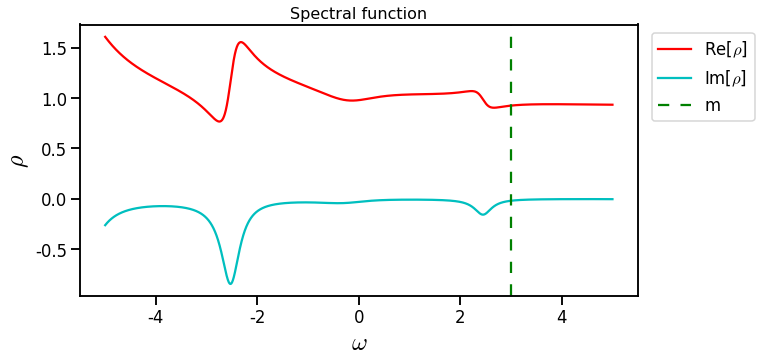

In [12]:
# other contexts: 'paper', 'poster', 'notebook'
with sns.plotting_context('talk'):
    fig, ax = plt.subplots(1, figsize=(10,5))
    plot_1d_function(ax, zmesh, NGreal_float1, ax_label = ['$\\omega$', '$\\rho$'], title = 'Spectral function', \
                    fn_label = '$\\rho$', legend = False)
    add_line(ax, omega0, color = 'g', dashes = (5, 5), label = 'm')
    ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')